<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

---

## Cài đặt các thư viện cần thiết

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Tải bộ dữ liệu đã được xử lí

In [2]:
# Load dữ liệu đã được xử lí từ data
data = pd.read_csv('../data/processed_data.csv', index_col=0)

In [3]:
# Hiển thị ra một số dòng của bộ dữ liệu
data.sample(10)

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
8100,Điện thoại Realme X Lite (Có Tiếng Việt),Realme,12.0,4.9,1374,https://mobilecity.vn/oppo/realme-x-lite.html,Trắng,3450000.0,3150000.0,Android 9,Snapdragon 710 (10 nm),6.0,64.0,4050.0,Nguyên khối,Realme,False,6.30,NaN,NaN,LCD,2,NaN,20.0,"[16.0, 5.0]",[25.0]
1841,Điện thoại Vivo iQOO Z9s 5G (Quốc tế - Dimensi...,Vivo,12.0,5.0,0,https://mobilecity.vn/dien-thoai/vivo-iqoo-z9s...,Xanh,6650000.0,NaN,Android 14,MediaTek Dimensity 7300 (4 nm)\r\n8 nhân (4x2....,12.0,256.0,5500.0,Khung nhựa cong\r\nMặt lưng nhựa cong\r\nKính ...,Vivo,False,6.77,120.0,1800.0,AMOLED,2,Li-Ion,44.0,"[50.0, 2.0]",[16.0]
4646,Điện thoại Sony Xperia 10 II (10 Mark 2) (Snap...,Sony,6.0,5.0,0,https://mobilecity.vn/dien-thoai/sony-xperia-1...,Trắng,NaN,NaN,Android 10,Qualcomm SDM665 Snapdragon 665 (11 nm)\r\n8 nh...,4.0,128.0,3600.0,"Khung nhựa, mặt lưng kính Gorilla Glass 6\r\nK...",Sony,False,6.00,NaN,NaN,OLED,2,Li-Po,18.0,"[12.0, 8.0, 8.0]",[8.0]
187,Điện thoại Samsung Galaxy S21 cũ 5G (Snap 888/...,Samsung Cũ,6.0,5.0,124,https://mobilecity.vn/dien-thoai/samsung-galax...,Tím,4950000.0,7450000.0,Android 11,Exynos 2100 (5 nm): 8 nhân (1x2.9 GHz & 3x2.80...,8.0,128.0,4000.0,Khung kim loại + Mặt lưng nhựa giả kính,Samsung,True,6.20,120.0,1300.0,AMOLED,2,Li-Ion,25.0,"[12.0, 64.0, 12.0]",[10.0]
825,Điện thoại Samsung Galaxy S24 Ultra Chính hãng...,Samsung Chính hãng,12.0,5.0,24,https://mobilecity.vn/dien-thoai/samsung-galax...,Xanh dương Titan,22950000.0,33990000.0,Android 14,Qualcomm SM8650-AC Snapdragon 8 Gen 3 (4 nm)\r...,12.0,256.0,5000.0,"Hỗ trợ bút S Pen tích hợp (Tích hợp Bluetooth,...",Samsung,False,6.80,120.0,2600.0,AMOLED,2,Li-Ion,45.0,"[200.0, 50.0, 10.0, 12.0]",[12.0]
5340,Điện thoại Realme Q5 Carnival Edition,Realme,12.0,5.0,0,https://mobilecity.vn/dien-thoai/realme-q5-car...,Đen,NaN,NaN,Android 12,Qualcomm SM6375 Snapdragon 695 5G (6 nm)\r\n8 ...,12.0,256.0,5000.0,Thanh + Cảm ứng,Realme,False,NaN,120.0,NaN,LCD,2,Li-Po,60.0,"[50.0, 2.0, 2.0]",[16.0]
6081,Điện thoại Sony Xperia 1 Cũ (Snapdragon 855 - ...,Sony,12.0,5.0,124,https://mobilecity.vn/sony/sony-xperia-1.html,Xanh,3050000.0,4950000.0,Android 9,Qualcomm SM8150 Snapdragon 855 (7 nm)\r\n8 nhâ...,6.0,64.0,3330.0,Khung kim loại + 2 mặt kính\r\nHỗ trợ IP65/IP6...,Sony,True,6.50,NaN,NaN,OLED,2,Li-Ion,18.0,"[12.0, 12.0, 12.0]",[8.0]
6119,Điện thoại Google Pixel 4a 5G (Snapdragon 765G...,Google,6.0,5.0,2,https://mobilecity.vn/dien-thoai/google-pixel-...,Trắng,3150000.0,3950000.0,Android 11,Qualcomm SM7250 Snapdragon 765G 5G (7 nm)\r\n8...,6.0,128.0,3885.0,Khung + mặt lưng nhựa\r\nKính trước Gorilla Gl...,Google,False,6.20,NaN,NaN,OLED,1,Li-Po,18.0,"[12.2, 16.0]",[8.0]
110,Điện thoại Vivo iQOO Z9x 5G (pin 6000mAh),Vivo,12.0,4.9,16,https://mobilecity.vn/dien-thoai/vivo-iqoo-z9x...,Đen,3550000.0,4950000.0,Android 14,Qualcomm SM6450 Snapdragon 6 Gen 1 (4 nm)\r\n8...,8.0,128.0,6000.0,Khung nhựa vuông vức\r\nMăt lưng nhựa phẳng; M...,Vivo,False,6.72,120.0,1000.0,LCD,2,NaN,44.0,"[50.0, 2.0]",[8.0]
1351,Điện thoại Tecno CAMON 30S (Helio G100),Tecno,12.0,5.0,1,https://mobilecity.vn/dien-thoai/tecno-camon-3...,Xanh,4450000.0,NaN,Android 14,Mediatek Helio G100 (6 nm)\r\n8 nhân (2x2.2 GH...,8.0,128.0,5000.0,Khung nhựa bo cong\r\nMặt lưng giả kính cong\r...,Tecno,False,6.78,120.0,1300.0,AMOLED,2,NaN,33.0,"[50.0, 2.0]",[13.0]


---

# Khám phá dữ liệu (tổng quát)

## Có bao nhiêu dòng và cột trong bộ dữ liệu?

In [4]:
## Xem số dòng và cột của bộ dữ liệu
nrows, ncols = data.shape
print(f"Dataset has {nrows} rows and {ncols} columns")

## Đánh giá bộ dữ liệu:
if nrows >= 1000 and ncols >= 10:
    print("Data is good!")
else:
    print("Data is not good!")

Dataset has 8855 rows and 26 columns
Data is good!


Bộ dữ liệu bao gồm 8662 hàng và 26 cột. Đây là một tập dữ liệu tốt!

## Mỗi dòng có ý nghĩa gì? Có quan trọng không khi mỗi dòng có ý nghĩa khác nhau?

- Mỗi dòng đại diện cho một mẫu điện thoại di động với các thông số kỹ thuật và thông tin khác nhau, các thuộc tính giúp hiểu rõ hơn về đặc điểm, cấu hình và giá trị của từng mẫu điện thoại.
- Rất quan trọng! Vì bộ dữ liệu này chứa thông tin về nhiều mẫu điện thoại khác nhau, mỗi dòng cần phải có các giá trị đúng và phản ánh chính xác từng mẫu điện thoại. Nếu các dòng có ý nghĩa khác nhau hoặc không đồng nhất, dữ liệu sẽ trở nên khó hiểu và không chính xác, ảnh hưởng đến các phân tích và kết luận bạn có thể rút ra từ dữ liệu.

## Có dòng dữ liệu nào bị trùng lặp không?

In [5]:
## Xem có dòng nào của dữ liệu bị trùng không?
num_duplicates = data.duplicated().sum()
if num_duplicates == 0:
    print("No duplicates found")
else:
    print(f"Found {num_duplicates} duplicates")
    # Xóa các dòng trùng lặp
    data = data.drop_duplicates()

Found 8 duplicates


Có một số dòng bị trùng lặp, ta sẽ loại bỏ các dòng dữ liệu bị trùng lặp trong bộ dữ liệu.

In [6]:
# In ra lại thông tin số dòng và cột của bộ dữ liệu
nrows, ncols = data.shape
print(f"Dataset has {nrows} rows and {ncols} columns")

Dataset has 8847 rows and 26 columns


Bộ dữ liệu bao gồm 8654 hàng và 26 cột.

## Các cột (thuộc tính) có ý nghĩa như thế nào?

| **Thuộc tính**               | **Ý nghĩa**                                                                                       |
|-----------------------------|--------------------------------------------------------------------------------------------------|
| `ten`                        | Tên của điện thoại (mẫu điện thoại)                                                              |
| `loai_dien_thoai`            | Loại điện thoại (ví dụ: Smartphone, Feature Phone, v.v.)                                         |
| `thoi_gian_bao_hanh`         | Thời gian bảo hành của điện thoại (thường tính bằng tháng hoặc năm)                             |
| `danh_gia`                   | Đánh giá trung bình của người dùng cho sản phẩm (thường là điểm từ 1 đến 5)                     |
| `so_luong_binh_luan`         | Số lượng bình luận hoặc đánh giá mà sản phẩm nhận được từ người dùng                           |
| `duong_dan`                  | Đường dẫn URL đến hình ảnh hoặc trang sản phẩm trên website                                      |
| `mau_sac`                    | Màu sắc của điện thoại (ví dụ: Đen, Trắng, Vàng, v.v.)                                          |
| `gia_moi`                    | Giá mới của điện thoại (giá bán lẻ hiện tại)                                                     |
| `gia_cu`                     | Giá cũ của điện thoại (nếu có, thường là giá bán ban đầu hoặc giá khuyến mãi trước đây)        |
| `he_dieu_hanh`               | Hệ điều hành mà điện thoại sử dụng (ví dụ: Android, iOS, v.v.)                                  |
| `cpu`                        | Bộ vi xử lý (CPU) của điện thoại (ví dụ: Snapdragon, Apple A-series, v.v.)                       |
| `ram`                        | Bộ nhớ RAM của điện thoại (đơn vị tính là GB)                                                    |
| `bo_nho_trong`               | Bộ nhớ trong của điện thoại (đơn vị tính là GB)                                                  |
| `dung_luong_pin`             | Dung lượng pin của điện thoại (thường tính bằng mAh - miliampere giờ)                           |
| `thiet_ke`                   | Thiết kế của điện thoại (ví dụ: kiểu dáng, chất liệu, thiết kế mỏng nhẹ, v.v.)                  |
| `hang_dien_thoai`            | Thương hiệu hoặc nhà sản xuất điện thoại (ví dụ: Samsung, Apple, Xiaomi, v.v.)                   |
| `la_dien_thoai_cu`           | Liệu điện thoại là hàng cũ hay không (1: có, 0: không)                                           |
| `kich_thuoc_man_hinh`        | Kích thước màn hình của điện thoại (đơn vị tính là inch)                                         |
| `tan_so_quet`                | Tần số quét màn hình (hertz, ví dụ: 60Hz, 120Hz, v.v.)                                            |
| `do_sang_man_hinh`           | Độ sáng tối đa của màn hình (thường tính bằng nits)                                              |
| `loai_man_hinh`              | Loại màn hình của điện thoại (ví dụ: AMOLED, LCD, v.v.)                                          |
| `so_the_sim`                 | Số lượng khe SIM hỗ trợ (ví dụ: 1 SIM, 2 SIM)                                                    |
| `loai_pin`                   | Loại pin của điện thoại (ví dụ: Li-ion, Li-polymer, v.v.)                                         |
| `cong_suat_sac`              | Công suất sạc tối đa của điện thoại (thường tính bằng W - watt)                                 |
| `do_phan_giai_cam_sau`       | Một list các độ phân giải của camera sau (đơn vị tính là megapixels - MP)                                     |
| `do_phan_giai_cam_truoc`     | Một list các độ phân giải của camera trước (đơn vị tính là megapixels - MP)                                   |



| **Thuộc tính**               | **Phân loại dữ liệu**                          |
|-----------------------------|-----------------------------------------------|
| `ten`                       | Categorical, Discrete, Nominal                |
| `loai_dien_thoai`           | Categorical, Discrete, Nominal                |
| `thoi_gian_bao_hanh`        | Numerical, Discrete, Ordinal                  |
| `danh_gia`                  | Numerical, Continuous, Ordinal                |
| `so_luong_binh_luan`        | Numerical, Discrete, Ratio                    |
| `duong_dan`                 | Categorical, Discrete, Nominal                |
| `mau_sac`                   | Categorical, Discrete, Nominal                |
| `gia_moi`                   | Numerical, Continuous, Ratio                  |
| `gia_cu`                    | Numerical, Continuous, Ratio                  |
| `he_dieu_hanh`              | Categorical, Discrete, Nominal                |
| `cpu`                       | Categorical, Discrete, Nominal                |
| `ram`                       | Numerical, Continuous, Ratio                  |
| `bo_nho_trong`              | Numerical, Continuous, Ratio                  |
| `dung_luong_pin`            | Numerical, Continuous, Ratio                  |
| `thiet_ke`                  | Categorical, Discrete, Nominal                |
| `hang_dien_thoai`           | Categorical, Discrete, Nominal                |
| `la_dien_thoai_cu`          | Categorical, Discrete, Nominal                |
| `kich_thuoc_man_hinh`       | Numerical, Continuous, Ratio                  |
| `tan_so_quet`               | Numerical, Continuous, Ordinal                |
| `do_sang_man_hinh`          | Numerical, Continuous, Ratio                  |
| `loai_man_hinh`             | Categorical, Discrete, Nominal                |
| `so_the_sim`                | Categorical, Discrete, Nominal                |
| `loai_pin`                  | Categorical, Discrete, Nominal                |
| `cong_suat_sac`             | Numerical, Continuous, Ratio                  |
| `do_phan_giai_cam_sau`      | Categorical, Discrete, Nominal                |
| `do_phan_giai_cam_truoc`    | Categorical, Discrete, Nominal                |


## Mỗi cột hiện tại có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp cho việc xử lý tiếp theo không?

In [7]:
## Kiểm tra kiểu dữ liệu của các cột
dtype_df = data.dtypes

# In ra kiểu dữ liệu của các cột
print(dtype_df)

ten                        object
loai_dien_thoai            object
thoi_gian_bao_hanh        float64
danh_gia                  float64
so_luong_binh_luan          int64
duong_dan                  object
mau_sac                    object
gia_moi                   float64
gia_cu                    float64
he_dieu_hanh               object
cpu                        object
ram                       float64
bo_nho_trong              float64
dung_luong_pin            float64
thiet_ke                   object
hang_dien_thoai            object
la_dien_thoai_cu             bool
kich_thuoc_man_hinh       float64
tan_so_quet               float64
do_sang_man_hinh          float64
loai_man_hinh              object
so_the_sim                  int64
loai_pin                   object
cong_suat_sac             float64
do_phan_giai_cam_sau       object
do_phan_giai_cam_truoc     object
dtype: object


Chuyển đổi một số thuộc tính phân loại đang có kiểu dữ liệu là 'object' sang 'category'.

In [8]:
# Chuyển cột đang có dữ liệu là 'object' sang 'categorical'
data['loai_dien_thoai'] = data['loai_dien_thoai'].astype('category')
data['mau_sac'] = data['mau_sac'].astype('category')
data['he_dieu_hanh'] = data['he_dieu_hanh'].astype('category')
data['cpu'] = data['cpu'].astype('category')
data['thiet_ke'] = data['thiet_ke'].astype('category')
data['hang_dien_thoai'] = data['hang_dien_thoai'].astype('category')
data['loai_man_hinh'] = data['loai_man_hinh'].astype('category')
data['loai_pin'] = data['loai_pin'].astype('category')
data['la_dien_thoai_cu'] = data['la_dien_thoai_cu'].astype('category')

In [9]:
# Kiểm tra lại kiểu dữ liệu của các cột
dtype_df = data.dtypes
print(dtype_df)

ten                         object
loai_dien_thoai           category
thoi_gian_bao_hanh         float64
danh_gia                   float64
so_luong_binh_luan           int64
duong_dan                   object
mau_sac                   category
gia_moi                    float64
gia_cu                     float64
he_dieu_hanh              category
cpu                       category
ram                        float64
bo_nho_trong               float64
dung_luong_pin             float64
thiet_ke                  category
hang_dien_thoai           category
la_dien_thoai_cu          category
kich_thuoc_man_hinh        float64
tan_so_quet                float64
do_sang_man_hinh           float64
loai_man_hinh             category
so_the_sim                   int64
loai_pin                  category
cong_suat_sac              float64
do_phan_giai_cam_sau        object
do_phan_giai_cam_truoc      object
dtype: object


Phần lớn các thuộc tính trong bộ dữ liệu đã được phân loại đúng với kiểu dữ liệu phù hợp của chúng. Tuy nhiên, một số thuộc tính cần được xử lý thêm trước khi tiến hành phân tích.

## Tỷ lệ giá trị bị thiếu là bao nhiêu?

In [10]:
# Xem thông tin của bộ dữ liệu
def missing_ratio(col): # Hàm tính tỉ lệ dữ liệu thiếu
    return col.isnull().mean() * 100

def missing_count(col): # Hàm tính số lượng dữ liệu thiếu
    return col.isnull().sum()

# Tạo dataframe mới chứa thông tin về dữ liệu thiếu
missing_info = data.agg([missing_count, missing_ratio]).T
missing_info = missing_info.rename(columns={'missing_count': 'Missing Values Count', 'missing_ratio': 'Missing Values Ratio (%)'})
missing_info = missing_info.sort_values(by='Missing Values Ratio (%)', ascending=False)
missing_info

,Missing Values Count,Missing Values Ratio (%)
gia_cu,3689.0,41.697751
do_sang_man_hinh,3448.0,38.973663
loai_pin,2166.0,24.482876
tan_so_quet,2101.0,23.748163
gia_moi,1504.0,17.000113
cong_suat_sac,487.0,5.504691
kich_thuoc_man_hinh,335.0,3.786594
loai_man_hinh,330.0,3.730078
bo_nho_trong,319.0,3.605742
mau_sac,279.0,3.153611


Các tỷ lệ dữ liệu bị thiếu trong bộ dữ liệu này dao động khá rộng, với "gia_cu" và "do_sang_man_hinh" có tỷ lệ thiếu cao nhất, khoảng 41% và 40% tương ứng. Các thuộc tính khác như "tan_so_quet" và "loai_pin" cũng có tỷ lệ thiếu đáng kể, khoảng 24%. Trong khi đó, một số thuộc tính khác có tỷ lệ dữ liệu bị thiếu thấp, dưới 5%, còn một số thuộc tính còn lại thì không bị thiếu dữ liệu.

In [11]:
# Nếu một trong những cột có missing_ratio > 50% thì xóa cột đó
columns_to_drop = missing_info[missing_info['Missing Values Ratio (%)'] > 50].index
data = data.drop(columns=columns_to_drop)

## Đối với kiểu dữ liệu dạng 'numeric', dữ liệu được phân bố như thế nào?

Hãy xem xét các thông tin của các cột dạng 'numeric' bao gồm giá trị nhỏ nhất, giá trị lớn nhất, các khoảng phân vị, và tỷ lệ dữ liệu bị thiếu.

In [12]:
# Định nghĩa hàm để tính toán các thống kê cho các cột số
# missing_ratio: tỷ lệ phần trăm các giá trị bị thiếu
def missing_ratio(series: pd.Series) -> float:
    return series.isna().mean() * 100
# lower_quartile: phần tử phân vị thứ nhất (25%)
def lower_quartile(series: pd.Series) -> float:
    return series.quantile(0.25)
# median: trung vị (50%)
def median(series: pd.Series) -> float:
    return series.quantile(0.5)
# upper_quartile: phần tử phân vị thứ ba (75%)
def upper_quartile(series: pd.Series) -> float:
    return series.quantile(0.75)

# tính toán các thống kê cho các cột số và lưu kết quả vào một DataFrame
num_col_info_df = data.select_dtypes(exclude=['category', 'object']).agg(
    [missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

# đổi tên chỉ số của DataFrame
num_col_info_df.index = ['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']

# làm tròn các giá trị đến 2 chữ số thập phân
num_col_info_df = num_col_info_df.round(2)
num_col_info_df


,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,gia_moi,gia_cu,ram,bo_nho_trong,dung_luong_pin,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,so_the_sim,cong_suat_sac
missing_ratio,0.0,0.0,0.0,17.0,41.7,0.19,3.61,2.26,3.79,23.75,38.97,0.0,5.5
min,0.0,4.0,0.0,100000.0,825000.0,0.75,16.00,4.50,3.50,60.00,400.00,1.0,1.0
lower_quartile,6.0,5.0,0.0,4750000.0,5450000.0,6.00,128.00,4500.00,6.50,120.00,800.00,2.0,25.0
median,12.0,5.0,7.0,7650000.0,8450000.0,8.00,256.00,5000.00,6.67,120.00,1200.00,2.0,45.0
upper_quartile,12.0,5.0,67.0,13250000.0,13950000.0,12.00,256.00,5000.00,6.74,120.00,1600.00,2.0,80.0
max,30.0,5.0,5490.0,51250000.0,68000000.0,24.00,1024.00,15500.00,8.70,240.00,6000.00,2.0,240.0


Các dữ liệu không cho thấy điều gì bất thường đáng kể, có một vài điểm còn chưa hợp lý. Tuy nhiên, một số cột có tỷ lệ dữ liệu bị thiếu cao cần được chú ý, vì nó có thể ảnh hưởng đến tính toàn vẹn và độ chính xác của phân tích sau này.

## Đối với kiểu dữ liệu dạng 'category', dữ liệu được phân bố như thế nào?

Xem xét thông tin trong cột 'category' bao gồm tỷ lệ dữ liệu bị thiếu, số lượng giá trị khác nhau, và liệt kê một vài giá trị điển hình.

In [13]:
# Tìm missing_ratio
def missing_ratio(col):
    return col.isna().mean() * 100

# Tìm num_values
def num_values(col):
    return col.nunique()

# Tìm value_ratios
def value_ratios(col):
    return (col.value_counts(normalize=True, ascending=False) * 100).round(1).to_dict()

# Tìm missing_ratio, num_values, value_ratios của data
cat_col_info_df = data.select_dtypes(include=['category']).agg([missing_ratio, num_values, value_ratios]).round(1)
cat_col_info_df.index = ['missing_ratio', 'num_values', 'value_ratios']

cat_col_info_df

,loai_dien_thoai,mau_sac,he_dieu_hanh,cpu,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,loai_man_hinh,loai_pin
missing_ratio,0.0,3.153611,0.0,0.169549,1.288572,0.0,0.0,3.730078,24.482876
num_values,43,477,23,701,677,56,2,3,3
value_ratios,"{'Vivo': 13.2, 'Redmi': 12.5, 'Samsung Chính h...","{'Đen': 23.0, 'Xanh': 13.3, 'Trắng': 13.0, 'Tí...","{'Android 13': 19.5, 'Android 14': 18.8, 'Andr...",{'Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm) ...,"{'Thanh + Cảm ứng': 20.8, 'Thanh + cảm ứng': 2...","{'Xiaomi': 27.9, 'Samsung': 14.0, 'Vivo': 13.6...","{False: 79.4, True: 20.6}","{'AMOLED': 57.3, 'OLED': 21.6, 'LCD': 21.0}","{'Li-Po': 70.9, 'Li-Ion': 23.8, 'Si/C': 5.3}"


Dữ liệu cho thấy một số điểm bất thường như tỷ lệ dữ liệu bị thiếu cao ở một số cột và sự không nhất quán trong cách nhập dữ liệu.

## Bộ dữ liệu có gì bất thường không?

Dữ liệu cho thấy một số bất thường bao gồm tỷ lệ dữ liệu thiếu cao ở một số cột, các giá trị không hợp lý, và sự không nhất quán trong dữ liệu của một số cột.

---

# Khám phá dữ liệu (chi tiết)

## Loại điện thoại

In [14]:
# Hiển thị tỉ lê dữ liệu thiếu của cột 'loai_dien_thoai'
print(f"Missing ratio of 'loai_dien_thoai': {missing_ratio(data['loai_dien_thoai'])}%")

#  Tất cả các giá trị khác nhau của cột 'loai_dien_thoai' và số lượng của chúng
data['loai_dien_thoai'].value_counts()

Missing ratio of 'loai_dien_thoai': 0.0%


loai_dien_thoai
Vivo                      1168
Redmi                     1110
Samsung Chính hãng         744
Realme                     737
Điện thoại Cũ              709
Xiaomi                     689
OPPO                       509
Samsung Cũ                 495
iPhone Cũ 99%              391
iPhone Chính hãng VN/A     296
OnePlus                    248
Tecno                      234
Nubia Red Magic            226
POCO                       223
Huawei                     161
Google                     131
Lenovo - Motorola          116
Asus (ROG Phone)            97
Apple (iPhone) - Lock       95
Sony                        94
Honor                       89
Vsmart                      61
Meizu                       61
Nokia                       32
LG                          32
Gionee                      15
Hãng khác                   13
LeEco                       11
Sky                         11
BlackBerry                  10
HTC                          9
BKAV                   

Dữ liệu trong cột "loai_dien_thoai" không chỉ bao gồm các thương hiệu điện thoại chính như Vivo, Redmi, và Samsung mà còn chứa các thông tin liên quan đến tình trạng của điện thoại, ví dụ như "Điện thoại Cũ", "Samsung Cũ", và "iPhone Cũ 99%". Điều này cho thấy cột này được sử dụng để lưu trữ cả thương hiệu và trạng thái của điện thoại, điều này có thể gây khó khăn trong phân tích và so sánh các thương hiệu một cách chính xác do sự không nhất quán trong dữ liệu.

## Thời gian bảo hành

Thời gian bảo hành là khoảng thời gian mà nhà sản xuất hoặc nhà bán lẻ cam kết sửa chữa hoặc thay thế miễn phí các lỗi kỹ thuật của điện thoại phát sinh trong quá trình sử dụng, miễn là lỗi đó nằm trong điều kiện bảo hành.

In [15]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'thoi_gian_bao_hanh'
print(f"Missing ratio of 'thoi_gian_bao_hanh': {missing_ratio(data['thoi_gian_bao_hanh'])}%")

# In ra số giá trị khác nhau của cột 'thoi_gian_bao_hanh'
data['thoi_gian_bao_hanh'].value_counts()

Missing ratio of 'thoi_gian_bao_hanh': 0.0%


thoi_gian_bao_hanh
12.0    5915
6.0     1487
0.0      941
18.0     364
24.0      69
1.0       40
30.0      21
15.0      10
Name: count, dtype: int64

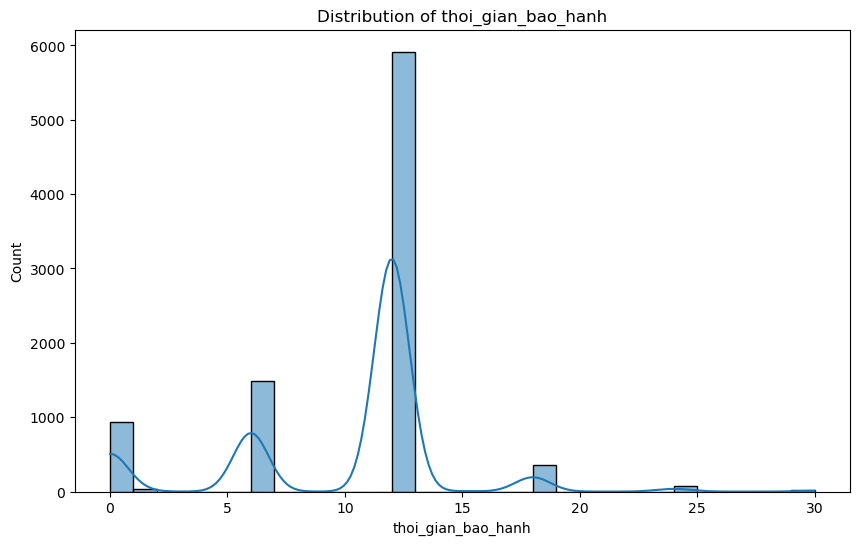

In [16]:
# Trực quan hóa: vẽ biểu đồ phân phối của cột 'thoi_gian_bao_hanh'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='thoi_gian_bao_hanh', bins=30, kde=True)
plt.title('Distribution of thoi_gian_bao_hanh')
plt.show()

Biểu đồ phân bố thời gian bảo hành cho thấy có ba điểm nhấn chính ở các khoảng thời gian bảo hành 0, 12, và 24 tháng. Điều này cho thấy hầu hết các sản phẩm có thời gian bảo hành tập trung chủ yếu ở 12 tháng, với một số lượng lớn sản phẩm được bảo hành trong 24 tháng và một số ít không có bảo hành (0 tháng).

## Điểm đánh giá

**Điểm đánh giá** là chỉ số phản ánh **mức độ hài lòng** hoặc **chất lượng** của điện thoại dựa trên ý kiến, trải nghiệm của người dùng hoặc chuyên gia, thường được thể hiện dưới dạng **thang điểm**.

In [17]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'danh_gia'
print(f"Missing ratio of 'danh_gia': {missing_ratio(data['danh_gia'])}%")

Missing ratio of 'danh_gia': 0.0%


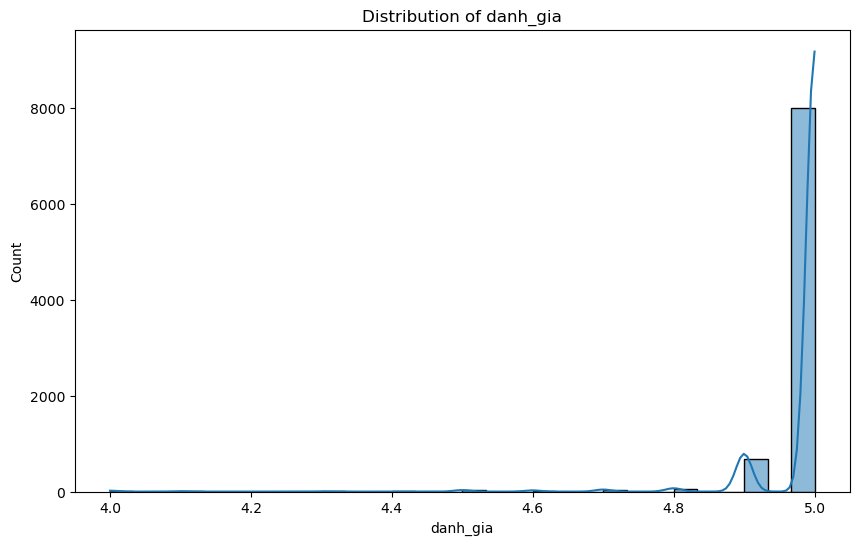

In [18]:
# Trực quan hóa: vẽ biểu đồ phân phối của cột 'danh_gia'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='danh_gia', bins=30, kde=True)
plt.title('Distribution of danh_gia')
plt.show()

Biểu đồ phân bố đánh giá cho thấy đa số các đánh giá tập trung ở mức cao nhất là 5.0, với một lượng nhỏ các đánh giá khác phân bố thấp hơn, chủ yếu dưới 4.0.

## Số lượt bình luận

**Số lượt bình luận** là tổng số ý kiến hoặc nhận xét mà người dùng để lại về một sản phẩm điện thoại, thường phản ánh **mức độ quan tâm** và **tương tác** của khách hàng đối với sản phẩm đó.

In [19]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'so_luong_binh_luan'
print(f"Missing ratio of 'so_luong_binh_luan': {missing_ratio(data['so_luong_binh_luan'])}%")

Missing ratio of 'so_luong_binh_luan': 0.0%


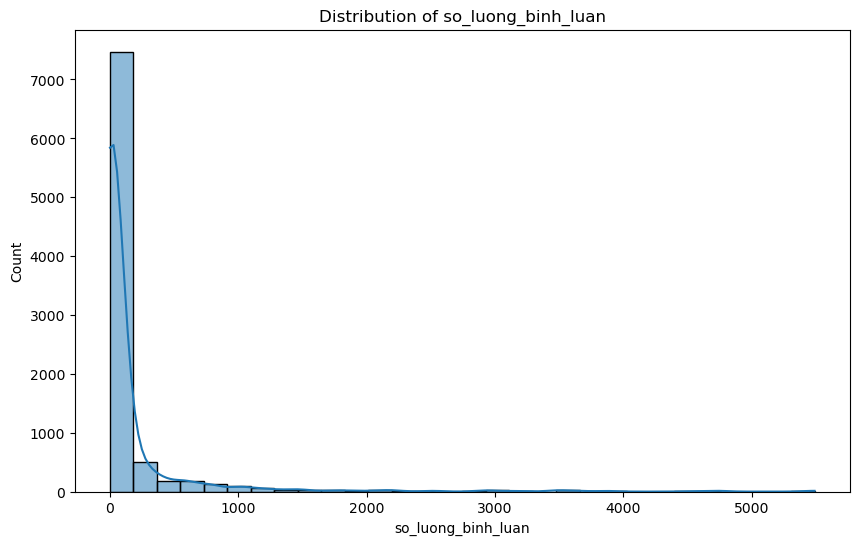

In [20]:
# Trực quan hóa: vẽ biểu đồ phân phối của cột 'so_luong_binh_luan'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='so_luong_binh_luan', bins=30, kde=True)
plt.title('Distribution of so_luong_binh_luan')
plt.show()

Biểu đồ cho thấy sự phân bố lệch phải rõ rệt. Phần lớn sản phẩm có số lượng bình luận rất thấp, chủ yếu nằm trong khoảng dưới 100 bình luận. Tuy nhiên, có một số ít sản phẩm có lượng bình luận rất cao (lên đến hơn 5000), tạo ra các giá trị ngoại lệ. Điều này phản ánh rằng chỉ một số sản phẩm nhận được sự quan tâm lớn từ người dùng, trong khi phần lớn các sản phẩm khác ít được bình luận hơn.

## Màu sắc

**Màu sắc của điện thoại** là **tùy chọn về màu ngoại hình** của thiết bị, thường bao gồm **mặt lưng, khung viền và các chi tiết thiết kế bên ngoài**. Màu sắc giúp điện thoại trở nên **thẩm mỹ, cá nhân hóa** và phù hợp với **gu thẩm mỹ** của người dùng. Các màu phổ biến bao gồm: **đen, trắng, bạc, vàng, xanh, đỏ**, và các phiên bản màu đặc biệt khác.

In [21]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'mau_sac'
print(f"Missing ratio of 'mau_sac': {missing_ratio(data['mau_sac']).round(2)}%")

Missing ratio of 'mau_sac': 3.15%


In [22]:
# Đối với điện thoại không có màu sắc thì ta sẽ điền giá trị là 'Không có'
data['mau_sac'] = data['mau_sac'].cat.add_categories('Không có').fillna('Không có')

In [23]:
# Xem tất cả các giá trị của cột màu sắc
print(f"Number of colors: {data['mau_sac'].nunique()}")
data['mau_sac'].value_counts()

Number of colors: 478


mau_sac
Đen                           1972
Xanh                          1139
Trắng                         1113
Tím                            404
Vàng                           293
Không có                       279
Xanh dương                     265
Xám                            256
Bạc                            233
Đỏ                             218
Hồng                           183
Cam                            151
Xanh lá                        140
Xanh bạc hà                     73
Xanh ngọc                       71
Xanh Dương                      52
Gold                            33
xanh                            31
Nâu                             27
Xanh Bạc Hà                     25
Đen trong                       24
Đồng                            23
Xanh Đậm                        23
Xanh Ngọc                       23
Vàng Đồng                       23
Xanh Navy                       22
Titanium                        21
Titan                           20
Titan Đen   

Cần chuẩn hóa dữ liệu màu sắc để loại bỏ sự không nhất quán và xử lý các giá trị không hợp lệ nhằm đảm bảo tính chính xác khi phân tích.

In [24]:
# Biển đổi dữ liệu cột 'mau_sac', chỉ lấy từ đầu tiên làm màu đại diện 
data['mau_sac'] = data['mau_sac'].str.split().str[0].str.lower().str.capitalize()

# In ra số màu sắc khác nhau
print(f"Number of colors: {data['mau_sac'].nunique()}")

Number of colors: 79


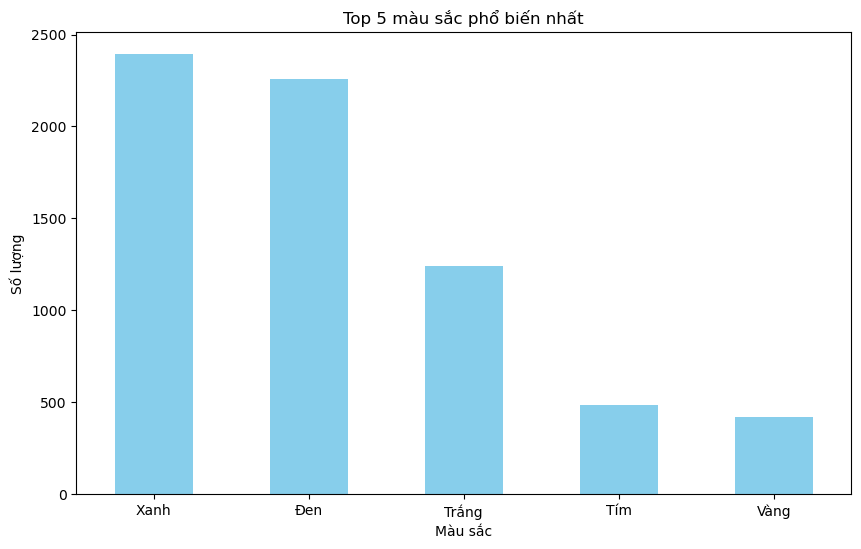

In [25]:
# Vẽ biểu đồ thể hiện top 5 màu sắc phổ biến nhất
plt.figure(figsize=(10, 6))
data['mau_sac'].value_counts().head(5).plot(kind='bar', color='skyblue', rot=0)
plt.title('Top 5 màu sắc phổ biến nhất')
plt.xlabel('Màu sắc')
plt.ylabel('Số lượng')
plt.show()

Biểu đồ cho thấy **Xanh** và **Đen** là hai màu phổ biến nhất, tiếp theo là **Trắng**. Trong khi đó, **Tím** và **Vàng** có số lượng thấp hơn đáng kể. Điều này cho thấy người dùng có xu hướng ưa chuộng các màu sắc truyền thống như **Xanh**, **Đen** và **Trắng** hơn so với các màu sắc khác.

## Giá mới, giá cũ

**Giá của điện thoại** là số tiền mà người mua cần trả để sở hữu thiết bị, thường được xác định dựa trên các yếu tố như **thương hiệu, cấu hình, tính năng, chất liệu, công nghệ** và **phân khúc thị trường** (phổ thông, tầm trung, cao cấp). Giá có thể thay đổi theo **khu vực, thời điểm** và các chương trình **khuyến mãi**.

In [26]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'gia_moi'
print(f"Missing ratio of 'gia_moi': {missing_ratio(data['gia_moi']).round(2)}%")
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'gia_cu'
print(f"Missing ratio of 'gia_cu': {missing_ratio(data['gia_cu']).round(2)}%")

Missing ratio of 'gia_moi': 17.0%
Missing ratio of 'gia_cu': 41.7%


Các cột 'gia_moi' và 'gia_cu' có tỷ lệ thiếu dữ liệu cao, bao gồm các trường hợp: 'gia_moi' thiếu nhưng 'gia_cu' có dữ liệu, 'gia_cu' thiếu nhưng 'gia_moi' có dữ liệu, hoặc cả hai cột đều thiếu dữ liệu.

In [27]:
# Nếu có giá mới mà không có giá cũ và ngược lại thì giá trị của cả 2 cột là bằng nhau
data['gia_cu'] = data['gia_cu'].fillna(data['gia_moi'])
data['gia_moi'] = data['gia_moi'].fillna(data['gia_cu'])

# Đối với các cột còn lại, ta sẽ điền giá trị bằng -1
data['gia_cu'] = data['gia_cu'].fillna(-1)
data['gia_moi'] = data['gia_moi'].fillna(-1)

# Kiểm tra lại missing values
print(f"Missing values in 'gia_cu': {data['gia_cu'].isnull().sum()}")
print(f"Missing values in 'gia_moi': {data['gia_moi'].isnull().sum()}")

Missing values in 'gia_cu': 0
Missing values in 'gia_moi': 0


Xem xét đến số lượng điện thoại dựa trên các mức giá. Cụ thể, các điện thoại có giá mới thấp hơn giá cũ được xem là đang được khuyến mãi. Đối với các sản phẩm có giá được ghi nhận là -1, điều này được hiểu là giá cả đang trong giai đoạn thương lượng.

In [28]:
# Đếm số lượng điện thoại
phone_count = data['gia_moi'].value_counts()

# Đếm số lượng điện thoại đang khuyến mãi
discounted_phone_count = data[data['gia_cu'] > data['gia_moi']]['gia_cu'].value_counts()

# Đếm số lượng điện thoại có giá trao đổi hoặc ngừng kinh doanh
negotiable_phone_count = data[data['gia_cu'] == -1]['gia_cu'].value_counts()

# In ra số lượng điện thoại
print(f"Total number of phones: {phone_count.sum()}")
print(f"Number of discounted phones: {discounted_phone_count.sum()}")
print(f"Number of negotiable phones: {negotiable_phone_count.sum()}")

Total number of phones: 8847
Number of discounted phones: 4210
Number of negotiable phones: 1343


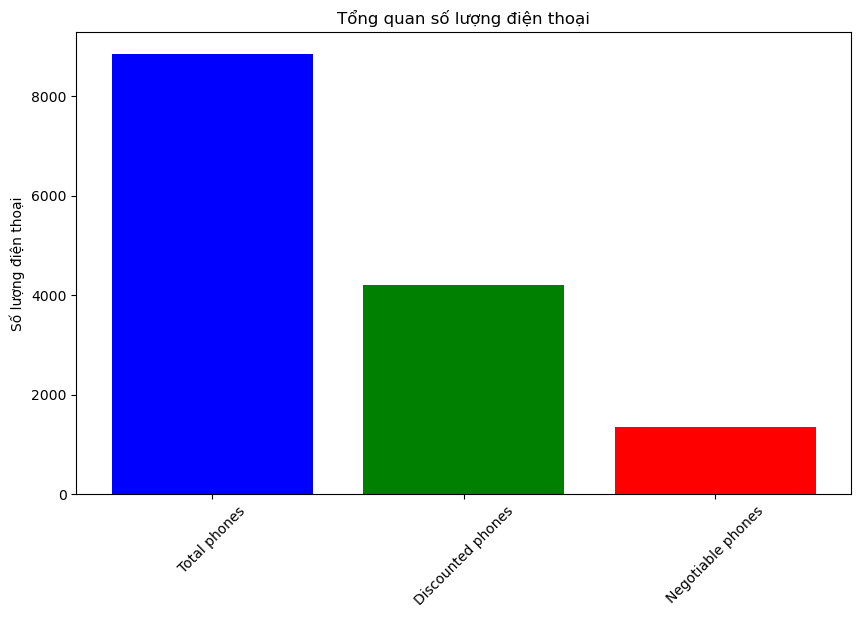

In [29]:
# Vẽ biểu đồ cột thể hiện số lượng điện thoại theo giá
# Data to plot
labels = ['Total phones', 'Discounted phones', 'Negotiable phones']
values = [phone_count.sum(), discounted_phone_count.sum(), negotiable_phone_count.sum()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])  # Assigning different colors for each bar

# Adding title and labels
plt.title('Tổng quan số lượng điện thoại')
plt.ylabel('Số lượng điện thoại')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

# Display the plot
plt.show()

Trong tổng số điện thoại được thể hiện, lượng điện thoại có giảm giá chiếm một tỷ lệ đáng kể so với tổng số điện thoại. Điều này có thể cho thấy rằng mặc dù có một số lượng lớn điện thoại được bán với giá giảm. Số lượng điện thoại có giảm giá có thể được coi là một phần quan trọng của chiến lược kinh doanh, thu hút khách hàng bằng cách cung cấp các ưu đãi giá trị.

## Hệ điều hành

Hiện tại, điện thoại thường sử dụng một trong hai hệ điều hành chính:

- **Hệ điều hành Android:** được phát triển bởi **Google** và là hệ điều hành mở, được sử dụng rộng rãi trên nhiều thương hiệu điện thoại như **Samsung, Xiaomi, Oppo, Vivo, Huawei** và các hãng khác. Hệ điều hành này có nhiều phiên bản khác nhau, thường xuyên được cập nhật để cải thiện tính năng và hiệu năng cho người dùng.  

- **Hệ điều hành iOS:** được phát triển độc quyền bởi **Apple** và chỉ có trên các thiết bị **iPhone**. Đây là hệ điều hành đóng, được tối ưu hóa cao, với nhiều phiên bản được cập nhật định kỳ để nâng cấp trải nghiệm người dùng và bảo mật hệ thống.  

Các hệ điều hành này đóng vai trò quan trọng trong việc vận hành thiết bị và cung cấp các tính năng tiện ích phục vụ nhu cầu sử dụng của người dùng.

In [30]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'he_dieu_hanh'
print(f"Missing ratio of 'he_dieu_hanh': {missing_ratio(data['he_dieu_hanh']).round(2)}%")

# In ra số lượng giá trị khác nhau của cột 'he_dieu_hanh'
data['he_dieu_hanh'].value_counts()

Missing ratio of 'he_dieu_hanh': 0.0%


he_dieu_hanh
Android 13    1725
Android 14    1663
Android 12    1629
Android 11    1154
Android 10     621
Android 9      476
Android 15     389
Android 8      186
iOS 16         173
iOS 15         136
iOS 14         116
iOS 17         112
iOS 18         108
Khác           103
Android 7       63
iOS 13          60
iOS 12          45
Android 6       27
Android 4       19
iOS 11          17
iOS 10          12
Android 5       10
iOS 7            3
Name: count, dtype: int64

In [31]:
# Tạo dataframe mới từ dữ liệu
df = data['he_dieu_hanh'].value_counts().reset_index()

# Đổi tên cột 'index' thành 'he_dieu_hanh_full'
df.columns = ['he_dieu_hanh', 'count']

# Tách hệ điều hành và phiên bản
df['He Dieu Hanh'] = df['he_dieu_hanh'].apply(lambda x: x.split()[0] if ' ' in x else x)
df['Phien Ban'] = df['he_dieu_hanh'].apply(lambda x: x.split()[1] if ' ' in x else 'None')

# Lấy các cột cần thiết và đổi tên
df = df[['He Dieu Hanh', 'Phien Ban', 'count']]
df.columns = ['He Dieu Hanh', 'Phien Ban', 'So Luong']

# In kết quả
print(f"Số phiên bản Android: {df[df['He Dieu Hanh'] == 'Android']['Phien Ban'].nunique()}")
print(f"Số phiên bản iOS: {df[df['He Dieu Hanh'] == 'iOS']['Phien Ban'].nunique()}")
df

Số phiên bản Android: 12
Số phiên bản iOS: 10


,He Dieu Hanh,Phien Ban,So Luong
0,Android,13,1725
1,Android,14,1663
2,Android,12,1629
3,Android,11,1154
4,Android,10,621
5,Android,9,476
6,Android,15,389
7,Android,8,186
8,iOS,16,173
9,iOS,15,136


Xác định tỷ lệ số lượng điện thoại thuộc các hệ điều hành **Android**, **iOS**, và **Khác** trong bộ dữ liệu.

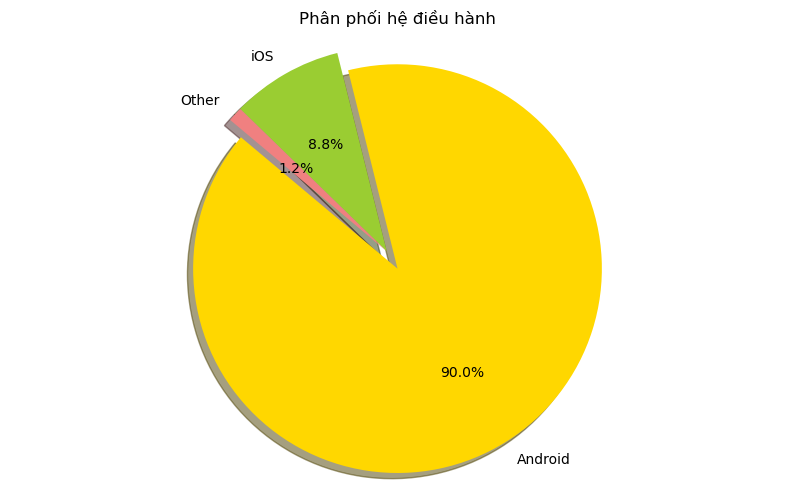

In [32]:
# Đếm sô lượng điện thoại Android, iOS va Khác
android_count = df[df['He Dieu Hanh'] == 'Android']['So Luong'].sum()
ios_count = df[df['He Dieu Hanh'] == 'iOS']['So Luong'].sum()
other_count = df[df['He Dieu Hanh'] == 'Khác']['So Luong'].sum()

# Trực quan hóa: Vẽ biểu đồ tròn thể hiện phân phối hệ điều hành
labels = ['Android', 'iOS', 'Other']
sizes = [android_count, ios_count, other_count]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Phân phối hệ điều hành')
plt.show()

Biểu đồ trên cho thấy **hệ điều hành Android** chiếm tỷ lệ áp đảo trong bộ dữ liệu với **90%**, trong khi **iOS** chỉ chiếm **8,8%** và các hệ điều hành khác chiếm một phần rất nhỏ, chỉ **1,2%**. Điều này chứng tỏ Android là hệ điều hành phổ biến nhất trong bộ dữ liệu này.

## Có bao nhiêu điện thoại cũ trong bộ dữ liệu?

**Điện thoại cũ** là điện thoại đã qua sử dụng, không còn trong tình trạng mới 100%. Chúng có thể được bán lại sau khi người dùng sử dụng một thời gian hoặc đã qua **tân trang, sửa chữa**.  

**Đặc điểm của điện thoại cũ**:  
- Có thể có **dấu hiệu hao mòn** như trầy xước, pin giảm hiệu suất.  
- Giá bán thường **rẻ hơn** so với điện thoại mới.  
- Chất lượng và bảo hành phụ thuộc vào **tình trạng máy** và **nơi bán**.  

Điện thoại cũ là lựa chọn phổ biến cho những ai muốn tiết kiệm chi phí mà vẫn sở hữu một thiết bị có tính năng tốt.

Sử dụng thuộc tính `la_dien_thoai_cu` để xác định số lượng điện thoại cũ có trong dữ liệu.

In [33]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'la_dien_thoai_cu'
print(f"Missing ratio of 'la_dien_thoai_cu': {missing_ratio(data['la_dien_thoai_cu']).round(2)}%")

# Đếm số lượng điện thoại cũ
oldphones_count = data['la_dien_thoai_cu'].astype(int).sum()

# In kết quả
print(f'Number of old phones: {oldphones_count}')

Missing ratio of 'la_dien_thoai_cu': 0.0%
Number of old phones: 1822


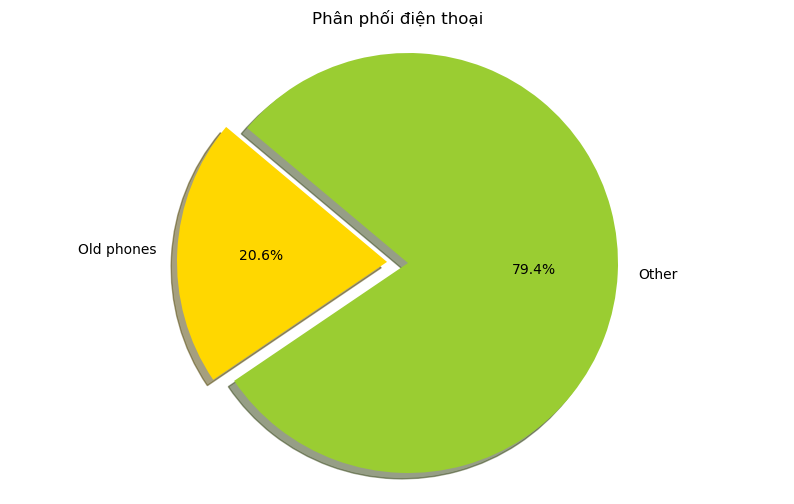

In [34]:
# Trực quan hóa: Vẽ biểu đồ tròn thể hiện phân phối điện thoại cũ và số còn lại trên tổng số điện thoại
labels = ['Old phones', 'Other']
sizes = [oldphones_count, phone_count.sum() - oldphones_count]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Phân phối điện thoại')
plt.show()

Biểu đồ cho thấy khoảng **21%** số điện thoại trong cửa hàng là điện thoại cũ. Điều này cho thấy cửa hàng cũng tập trung vào hoạt động **kinh doanh, mua bán và trao đổi điện thoại cũ** bên cạnh các dòng sản phẩm mới. Điều này có thể đáp ứng nhu cầu của khách hàng muốn tìm kiếm các thiết bị có mức giá hợp lý hơn.

## CPU

**CPU** là bộ xử lý trung tâm, quyết định **hiệu năng** và **tốc độ xử lý** của thiết bị. Các loại CPU chính bao gồm:

- **Qualcomm Snapdragon**: Hiệu năng mạnh mẽ, tối ưu năng lượng, phổ biến trên nhiều smartphone cao cấp và tầm trung.  
- **MediaTek Dimensity**: Hiệu năng tốt, giá cạnh tranh, hỗ trợ công nghệ **5G**, thường xuất hiện trên các thiết bị tầm trung.  
- **Apple A-Series**: CPU độc quyền của Apple, nổi bật với hiệu năng đơn nhân mạnh mẽ và tối ưu hóa phần mềm cho iPhone, iPad.  
- **Exynos**: Được Samsung phát triển, cung cấp hiệu năng ổn định và khả năng xử lý đồ họa tốt.  

**Các CPU này có nhiều phiên bản khác nhau**, liên tục được cải tiến để đáp ứng nhu cầu về hiệu năng, tiết kiệm pin và hỗ trợ công nghệ mới như **AI**, **5G** và **đồ họa cao cấp**.

In [35]:
# In ra tỉ lệ bị thiếu của cột 'cpu'
missing_ratio_cpu = missing_ratio(data['cpu'])
print(f"Missing ratio of 'cpu': {missing_ratio_cpu:.2f}%")
# In ra số giá trị khác nhau của cột 'cpu' và số lượng của mỗi giá trị
print(f"Number of CPUs: {data['cpu'].nunique()}\n{data['cpu'].value_counts()}")

Missing ratio of 'cpu': 0.17%
Number of CPUs: 701
cpu
Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm)\r\n8 nhân (1x3.19 GHz & 3x2.75 GHz & 4x1.80 GHz)\r\nGPU: Adreno 730                                                                                                                                    231
Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)\r\n8 nhân (1x3.00 GHz & 3x2.50 GHz & 4x1.80 GHz)\r\nGPU: Adreno 730                                                                                                                                     205
Qualcomm SM8550 Snapdragon 8 Gen 2 (4 nm)\r\n8 nhân (1x3.2 GHz & 2x2.8 GHz & 2x2.8 GHz & 3x2.0 GHz)\r\nGPU: Adreno 740                                                                                                                            187
Qualcomm SM8550-AB Snapdragon 8 Gen 2 (4 nm)\r\n8 nhân (1x3.2 GHz & 2x2.8 GHz & 2x2.8 GHz & 3x2.0 GHz)\r\nGPU: Adreno 740                                                                                       

In [36]:
# Add 'Unknown' category to 'cpu' column
data['cpu'] = data['cpu'].cat.add_categories('Unknown')

# Fill missing values in 'cpu' column with 'Unknown'
data['cpu'] = data['cpu'].fillna('Unknown')

# Tạo DataFrame
df = pd.DataFrame(data)
df

# Hàm xác định loại CPU
def classify_cpu(cpu_name):
    if 'Snapdragon' in cpu_name:
        return 'Qualcomm Snapdragon'
    elif 'Dimensity' in cpu_name:
        return 'MediaTek Dimensity'
    elif 'Apple A' in cpu_name:
        return 'Apple A-Series'
    elif 'Exynos' in cpu_name:
        return 'Exynos'
    else:
        return 'Other'

# Áp dụng hàm phân loại CPU
df['CPU_Loai'] = df['cpu'].apply(classify_cpu)
df = df['CPU_Loai'].value_counts().reset_index()
df.columns = ['CPU', 'So Luong']

# In kết quả
df

,CPU,So Luong
0,Qualcomm Snapdragon,4820
1,MediaTek Dimensity,1839
2,Other,1024
3,Apple A-Series,782
4,Exynos,382


Phân tích tỷ lệ số lượng của từng loại CPU so với tổng số trong dữ liệu.

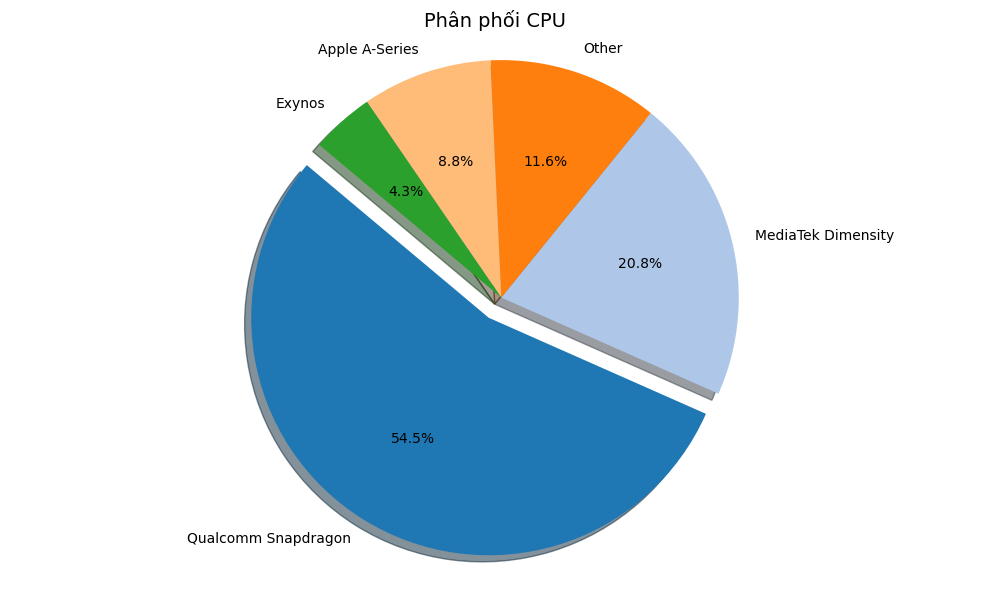

In [37]:
# Trực quan hóa:Vẽ biểu đồ tròn thể hiện phân phối CPU
labels = df['CPU']
sizes = df['So Luong']
colors = plt.cm.tab20.colors[:len(labels)]
explode = [0.1 if size == max(sizes) else 0 for size in sizes]
plt.figure(figsize=(10, 6))
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140,
    textprops={'fontsize': 10}
)
plt.axis('equal')
plt.title('Phân phối CPU', fontsize=14)
plt.tight_layout()
plt.show()

Biểu đồ cho thấy **Qualcomm Snapdragon** chiếm tỷ lệ lớn nhất (**54,5%**), tiếp theo là **MediaTek Dimensity** (**20,8%**). Các dòng CPU còn lại như **Apple A-Series** (8,8%), **Other** (11,6%) và **Exynos** (4,3%) chiếm tỷ lệ nhỏ hơn, cho thấy Snapdragon và Dimensity chiếm ưu thế trên thị trường CPU.

In [38]:
# Lưu dữ liệu đã xử lý vào file csv
# df = data.copy()
# df['CPU_Loai'] = df['cpu'].apply(classify_cpu)
# df.to_csv('../data/new_processed_data.csv')

## RAM

**RAM** trong điện thoại là bộ nhớ tạm thời, đóng vai trò quan trọng trong việc lưu trữ và truy cập dữ liệu của các ứng dụng đang hoạt động. RAM ảnh hưởng trực tiếp đến khả năng **đa nhiệm** và **hiệu suất hoạt động** của thiết bị.

**Dung lượng RAM** cũng có nhiều mức khác nhau tùy theo phân khúc điện thoại:  
- **Phổ thông**: 4GB - 6GB.  
- **Tầm trung**: 8GB - 12GB.  
- **Cao cấp**: 12GB - 16GB hoặc cao hơn.

In [39]:
# In ra tỉ lệ bị thiếu của cột 'ram'
missing_ratio_ram = missing_ratio(data['ram'])
print(f"Missing ratio of 'ram': {missing_ratio_ram:.2f}%")

# In ra số giá trị khác nhau của cột 'ram' và số lượng của mỗi giá trị
print(f"Number of RAMs: {data['ram'].nunique()}\n{data['ram'].value_counts()}")

Missing ratio of 'ram': 0.19%
Number of RAMs: 12
ram
8.00     3125
12.00    2191
6.00     1318
4.00      998
16.00     783
3.00      260
2.00       96
24.00      37
1.00       15
15.00       4
18.00       2
0.75        1
Name: count, dtype: int64


Phần lớn thiết bị có RAM từ **6GB đến 12GB**, phản ánh xu hướng thị trường điện thoại hiện tại. Các giá trị bất thường như **0.75GB** và **24GB** là ngoại lệ cần xem xét thêm về ngữ cảnh dữ liệu.

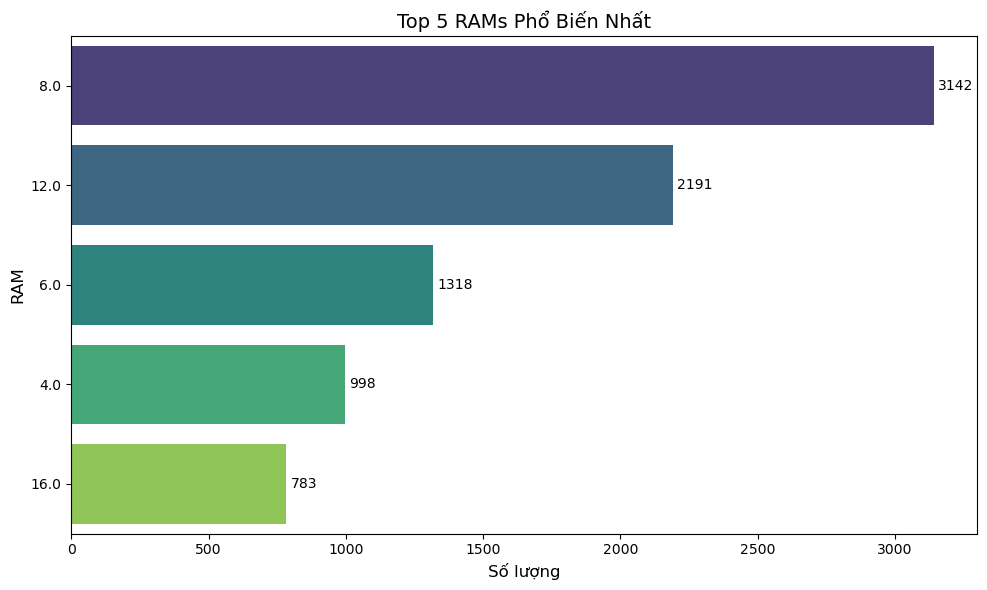

In [40]:
# Fill missing values in 'ram' column with the most common value
most_common_ram = data['ram'].mode()[0]
data['ram'] = data['ram'].fillna(most_common_ram)

plt.figure(figsize=(10, 6))
ax = sns.countplot(y='ram', 
                   data=data, 
                   order=data['ram'].value_counts().iloc[:5].index, 
                   palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Top 5 RAMs Phổ Biến Nhất', fontsize=14)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('RAM', fontsize=12)

plt.tight_layout()
plt.show()

Phần lớn thiết bị trong cửa hàng có RAM từ **8GB đến 12GB**, phản ánh nhu cầu sử dụng hiện tại của người dùng về hiệu năng và khả năng đa nhiệm. Các mức RAM thấp hơn (4GB, 6GB) vẫn phổ biến trên các thiết bị tầm trung. RAM 16GB dù ít hơn nhưng cho thấy sự xuất hiện của các dòng điện thoại cao cấp và chuyên dụng.

## Bộ nhớ trong

**Bộ nhớ trong của điện thoại** là không gian lưu trữ dữ liệu cố định trên thiết bị, dùng để lưu hệ điều hành, ứng dụng, hình ảnh, video và các tệp khác của người dùng. Dung lượng bộ nhớ trong thường có các mức phổ biến như **32GB, 64GB, 128GB, 256GB** hoặc cao hơn. Bộ nhớ trong càng lớn, khả năng lưu trữ dữ liệu càng nhiều, giúp người dùng thoải mái sử dụng mà không lo đầy bộ nhớ.

In [41]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'bo_nho_trong'
print(f"Missing ratio of 'bo_nho_trong': {missing_ratio(data['bo_nho_trong']).round(2)}%")

Missing ratio of 'bo_nho_trong': 3.61%


In [42]:
# Điền giá trị thiếu bằng giá trị phổ biến nhất
most_common_bo_nho_trong = data['bo_nho_trong'].mode()[0]
data['bo_nho_trong'] = data['bo_nho_trong'].fillna(most_common_bo_nho_trong)

# In ra số lượng giá trị khác nhau của cột 'bo_nho_trong'
print(f"Number of internal storages: {data['bo_nho_trong'].nunique()}\n{data['bo_nho_trong'].value_counts()}")

Number of internal storages: 11
bo_nho_trong
256.0     3595
128.0     2835
512.0     1204
64.0       678
1024.0     302
32.0       210
16.0        14
255.0        4
268.0        2
126.0        2
640.0        1
Name: count, dtype: int64


Phân tích sự phân phối dung lượng bộ nhớ trong của điện thoại bằng biểu đồ cột.

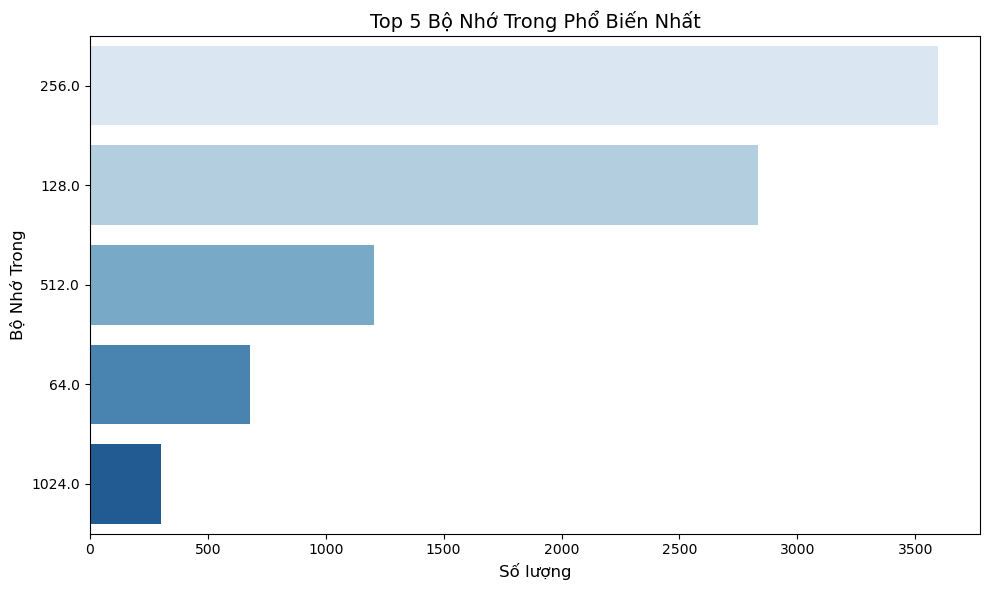

In [43]:
# Trực quan hóa: Vẽ biểu đồ cột thể hiện phân phối của cột 'bo_nho_trong'
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y='bo_nho_trong',
    data=data,
    order=data['bo_nho_trong'].value_counts().iloc[:5].index,
    palette=sns.color_palette("Blues", n_colors=5)  # Sử dụng màu đơn sắc (sắc độ xanh lam)
)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Top 5 Bộ Nhớ Trong Phổ Biến Nhất', fontsize=14)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Bộ Nhớ Trong', fontsize=12)

# Tinh chỉnh và hiển thị
plt.tight_layout()
plt.show()


**Nhận xét**:  
Bộ nhớ trong **256GB** và **128GB** là hai mức phổ biến nhất hiện nay. Mức **64GB** xuất hiện ít hơn, chủ yếu trên các sản phẩm cũ hoặc thiết bị tầm thấp. Các mức như **512GB** và **1024GB** thường xuất hiện trên các thiết bị cao cấp.

## Dung lượng Pin

**Dung lượng pin** là chỉ số đo khả năng lưu trữ năng lượng của pin điện thoại, thường được tính bằng đơn vị **mAh** (milliampere-hour). Dung lượng pin càng cao, thời gian sử dụng điện thoại càng lâu trước khi cần sạc lại.

In [44]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'dung_luong_pin'
print(f"Missing ratio of 'dung_luong_pin': {missing_ratio(data['dung_luong_pin']).round(2)}%")

Missing ratio of 'dung_luong_pin': 2.26%


In [45]:
# Lấy 10 giá trị phổ biến nhất và tính trung bình cộng
top_10_common_mean = data['dung_luong_pin'].value_counts().index[:10].tolist()
top_10_common_mean = pd.Series(top_10_common_mean).astype(float).mean()

# Điền các giá trị thiếu bằng trung bình cộng 10 giá trị phổ biến nhất
data['dung_luong_pin'] = data['dung_luong_pin'].fillna(top_10_common_mean)

# Hiển thị số lượng giá trị khác nhau của cột 'dung_luong_pin'
print(f"Number of battery capacities: {data['dung_luong_pin'].nunique()}\n{data['dung_luong_pin'].value_counts()}")

Number of battery capacities: 169
dung_luong_pin
5000.0     2828
4500.0      929
6000.0      454
4000.0      426
5500.0      388
4700.0      277
4600.0      228
4856.0      200
4300.0      159
4800.0      140
5160.0      124
5100.0      122
3000.0       85
6500.0       75
4400.0       74
5400.0       73
2815.0       72
3700.0       70
3500.0       63
5080.0       57
4520.0       57
4200.0       53
3300.0       50
7000.0       49
6100.0       49
4323.0       46
5030.0       44
3200.0       42
5200.0       41
5800.0       39
4780.0       36
4820.0       36
2227.0       36
6200.0       35
4650.0       34
4350.0       34
3279.0       33
2438.0       33
3240.0       33
3900.0       31
3110.0       30
4610.0       30
4352.0       30
4900.0       29
3400.0       28
6150.0       28
5300.0       28
4230.0       28
5065.0       27
5020.0       26
5050.0       26
4310.0       26
4250.0       24
3582.0       24
4720.0       24
5600.0       24
2942.0       24
4880.0       24
4810.0       24
3687.0 

Xem xét sự phân bố dung lượng bộ nhớ trong của các điện thoại.

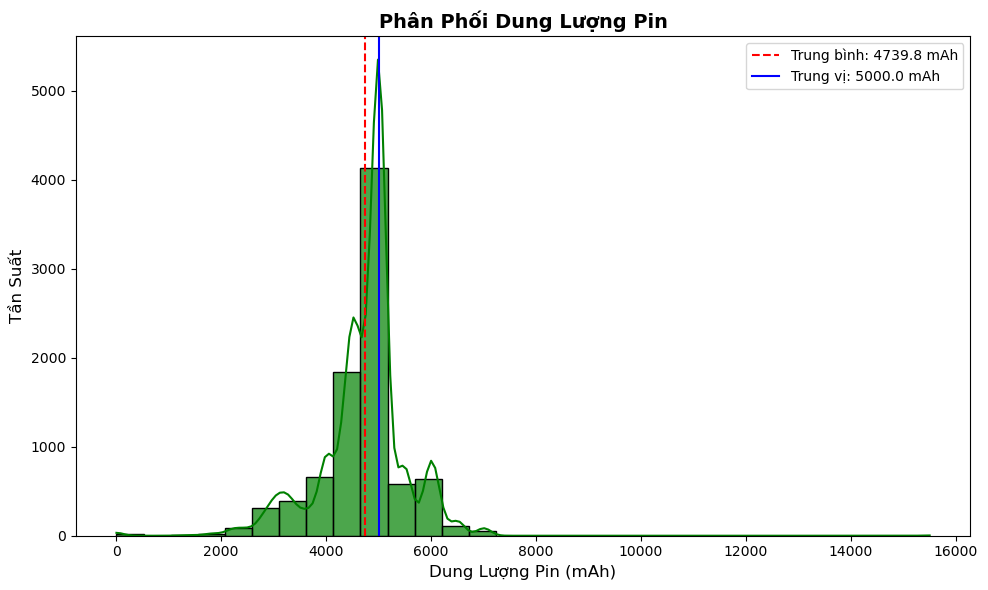

In [46]:
# Trực quan hóa: Vẽ biểu đồ histogram thể hiện phân phối của cột 'dung_luong_pin'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='dung_luong_pin', bins=30, kde=True, color='green', alpha=0.7, edgecolor='black')
mean_value = data['dung_luong_pin'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Trung bình: {mean_value:.1f} mAh')
median_value = data['dung_luong_pin'].median()
plt.axvline(median_value, color='blue', linestyle='-', linewidth=1.5, label=f'Trung vị: {median_value:.1f} mAh')
plt.title('Phân Phối Dung Lượng Pin', fontsize=14, fontweight='bold')
plt.xlabel('Dung Lượng Pin (mAh)', fontsize=12)
plt.ylabel('Tần Suất', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

**Nhận xét**:  
Dung lượng pin phổ biến nhất là **5000 mAh**, với phần lớn thiết bị tập trung quanh mức này. Trung vị (**5000 mAh**) lớn hơn trung bình (**4739,8 mAh**), cho thấy phân phối lệch trái nhẹ. Một số ít thiết bị có pin rất lớn, là các ngoại lệ.

## Loại Pin

Vai trò chính của pin là lưu trữ và cung cấp điện năng để thiết bị hoạt động một cách liên tục và ổn định. Dung lượng và công nghệ pin ảnh hưởng trực tiếp đến **thời gian sử dụng** và **hiệu suất** của thiết bị.

**Các loại pin phổ biến**:  

- **Li-ion (Lithium-ion)**: Pin phổ biến nhất hiện nay với dung lượng cao, trọng lượng nhẹ và hiệu suất ổn định.  
- **Li-Po (Lithium-Polymer)**: Mỏng, linh hoạt, nhẹ hơn Li-ion, thường dùng cho các thiết bị cao cấp.  
- **Si/C (Silicon-Carbon)**: Pin cải tiến với **độ bền cao** và **dung lượng lớn hơn**, giúp tăng thời gian sử dụng và tốc độ sạc, nhưng chi phí sản xuất còn cao.  

Hiện nay, pin **Li-ion** và **Li-Po** chiếm ưu thế trong thị trường điện thoại thông minh nhờ khả năng lưu trữ năng lượng tốt, tuổi thọ cao và trọng lượng nhẹ. Pin **Si/C** đang nổi lên như một công nghệ tiềm năng trong tương lai, bên cạnh Li-ion và Li-Po.  

In [47]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'loai_pin'
print(f"Missing ratio of 'loai_pin': {missing_ratio(data['loai_pin']).round(2)}%")

# Kiểm tra xem giá trị 'Không xác định' đã tồn tại trong các kiểu pin chưa, nếu chưa thì thêm vào
if 'Không xác định' not in data['loai_pin'].cat.categories:
	data['loai_pin'] = data['loai_pin'].cat.add_categories('Không xác định')

# Đối với các kiểu pin bị thiếu giá trị, ta sẽ điền giá trị là 'Không xác định'
data['loai_pin'] = data['loai_pin'].fillna('Không xác định')

# Xem số lượng các giá trị khác nhau của cột 'pin' và số lượng của mỗi giá trị
print(f"Number of batteries: {data['loai_pin'].nunique()}\n{data['loai_pin'].value_counts()}")

Missing ratio of 'loai_pin': 24.48%
Number of batteries: 4
loai_pin
Li-Po             4736
Không xác định    2166
Li-Ion            1588
Si/C               357
Name: count, dtype: int64


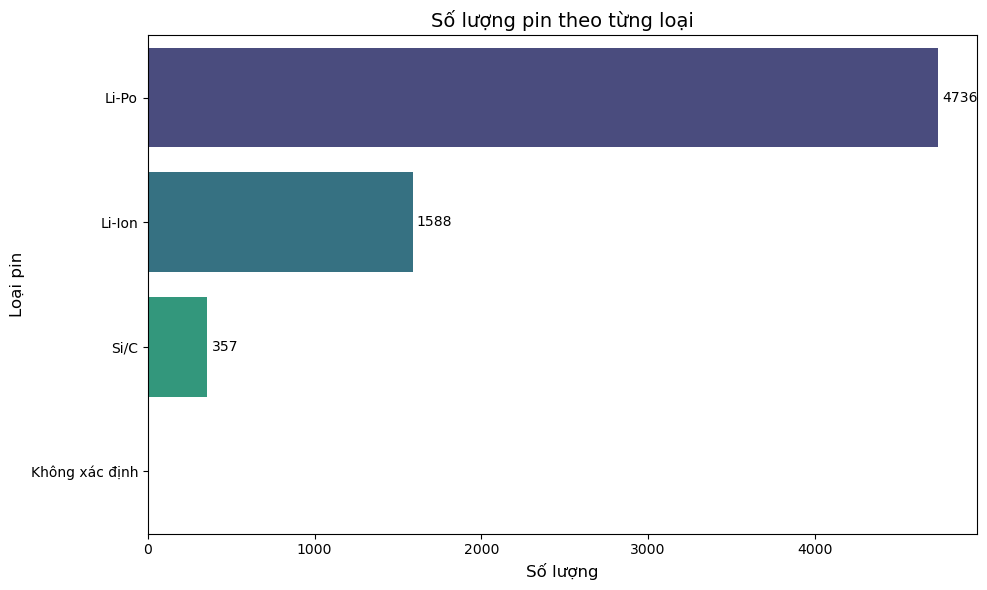

In [48]:
# Trực quan hóa: Vẽ biểu đồ cột thể hiện số lượng pin theo từng loại
data_filtered = data[data['loai_pin'] != 'Không xác định']
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='loai_pin', 
                   data=data_filtered, 
                   order=data_filtered['loai_pin'].value_counts().index, 
                   palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Số lượng pin theo từng loại', fontsize=14)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Loại pin', fontsize=12)
plt.tight_layout()
plt.show()

Biểu đồ cho thấy số lượng pin Li-Po chiếm ưu thế với 4736 thiết bị, vượt trội so với các loại pin khác. Điều này cho thấy pin Li-Po đang được sử dụng rộng rãi nhờ tính linh hoạt và hiệu năng tốt, phù hợp cho các thiết bị hiện đại.

## Công suất sạc

**Công suất sạc** là chỉ số đo tốc độ sạc pin của điện thoại, thường tính bằng **Watt (W)**. Công suất càng cao, thời gian sạc pin càng nhanh.  

**Xu hướng hiện nay**:  
- Điện thoại ngày càng được trang bị **công suất sạc lớn** (từ **33W** đến **120W**), đặc biệt trên các dòng flagship và gaming phone.  
- Xu hướng sạc siêu nhanh giúp rút ngắn thời gian sạc, đáp ứng nhu cầu sử dụng liên tục của người dùng.

In [49]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'cong_suat_sac'
print(f"Missing ratio of 'cong_suat_sac': {missing_ratio(data['cong_suat_sac']).round(2)}%")

# In ra số lượng các giá trị khác nhau của cột 'cong_suat_sac' và số lượng của mỗi giá trị
chargers = data['cong_suat_sac'].value_counts()
n_charger = chargers.count()
print(f"Number of chargers: {n_charger}")
print(chargers)

Missing ratio of 'cong_suat_sac': 5.5%
Number of chargers: 37
cong_suat_sac
67.0     886
120.0    820
80.0     750
25.0     638
33.0     634
15.0     632
18.0     631
45.0     481
20.0     371
100.0    322
65.0     310
90.0     258
30.0     234
44.0     228
66.0     208
10.0     205
27.0     164
55.0      72
150.0     63
50.0      53
22.5      44
23.0      40
68.0      37
165.0     36
240.0     32
70.0      31
200.0     31
35.0      28
21.0      25
125.0     21
40.0      20
37.0      16
135.0     14
60.0      12
7.5        8
1.0        4
210.0      1
Name: count, dtype: int64


In [50]:
# Điền giá trị thiếu bằng giá trị phổ biến nhất bằng giá trị nhỏ nhất
least_common_charger = chargers.index[-1]
data['cong_suat_sac'] = data['cong_suat_sac'].fillna(least_common_charger)

Phân Tích Phân Phối Công Suất Sạc Phổ Biến Của Điện Thoại.

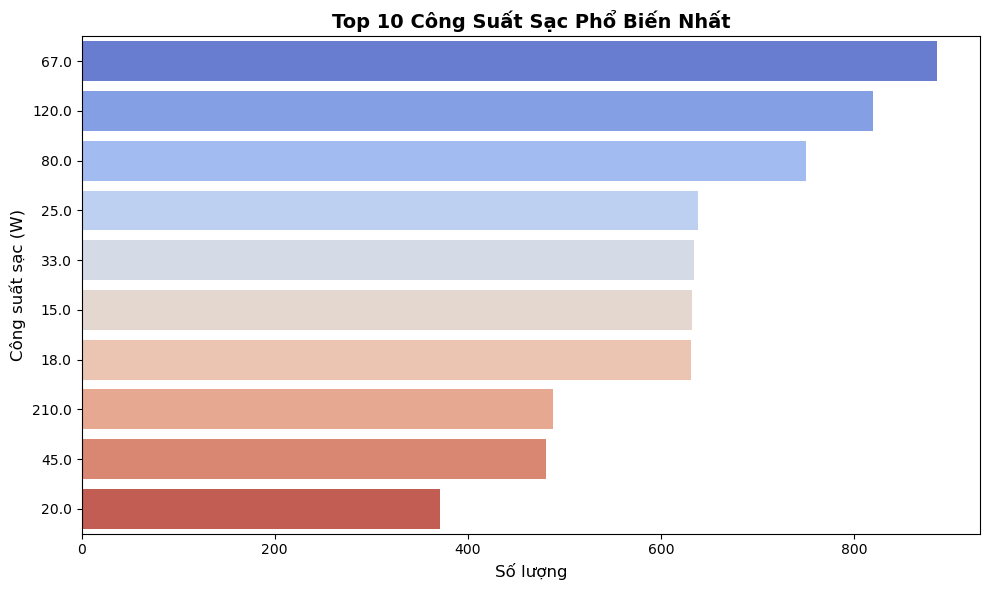

In [51]:
# Trực quan hóa số lượng sạc theo từng loại sạc (top 10)
plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", n_colors=10)
sns.countplot(y='cong_suat_sac', data=data, order=data['cong_suat_sac'].value_counts().iloc[:10].index, palette=palette)
plt.title('Top 10 Công Suất Sạc Phổ Biến Nhất', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Công suất sạc (W)', fontsize=12)
plt.tight_layout()
plt.show()

**Nhận xét**: Công suất sạc cao, đặc biệt từ **67W trở lên**, đang trở thành xu hướng phổ biến, đáp ứng nhu cầu sạc nhanh và sử dụng liên tục của người dùng.

## Hãng điện thoại

**Hãng điện thoại** là **thương hiệu** hoặc **nhà sản xuất** cung cấp các thiết bị di động trên thị trường. Mỗi hãng điện thoại có dòng sản phẩm riêng với thiết kế, tính năng và công nghệ khác nhau, phục vụ nhiều phân khúc khách hàng.

In [52]:
# Kiểm tra tỉ lệ dữ liệu bị thiếu của cột 'hang_dien_thoai'
missing_ratio_brand = missing_ratio(data['hang_dien_thoai'])
print(f"Missing ratio of 'hang_dien_thoai': {missing_ratio_brand:.2f}%")

# Chuẩn hóa cột 'hang_dien_thoai'
data['hang_dien_thoai'] = data['hang_dien_thoai'].str.strip().str.replace(' ', '_').str.lower().str.title()

# Đếm và gộp các hãng có số lượng ít hơn 10 thành 'Other'
brand_counts = data['hang_dien_thoai'].value_counts()
data['hang_dien_thoai'] = data['hang_dien_thoai'].apply(lambda x: x if brand_counts[x] >= 10 else 'Other')

# In ra kết quả
print(f"Number of phone brands after merging: {data['hang_dien_thoai'].nunique()}")
print(data['hang_dien_thoai'].value_counts())

Missing ratio of 'hang_dien_thoai': 0.00%
Number of phone brands after merging: 29
hang_dien_thoai
Xiaomi        2467
Samsung       1239
Vivo          1205
Realme         836
Iphone         782
Oppo           522
Oneplus        236
Tecno          220
Honor          202
Nubia          156
Google         125
Asus           109
Zte            105
Sony            93
Motorola        92
Other           82
Meizu           61
Vsmart          59
Huawei          45
Nothing         38
Lg              32
Nokia           32
Lenovo          23
Nio             21
Infinix         18
Gionee          15
Leeco           11
Sky             11
Blackberry      10
Name: count, dtype: int64


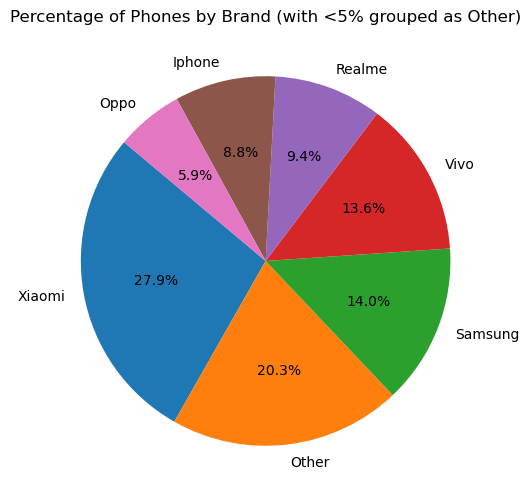

In [53]:
# Trực quan hóa: Vẽ biểu đồ tròn thể hiện phân phối hãng điện thoại
# Tính tần suất của từng hãng
brand_counts = data['hang_dien_thoai'].value_counts()

# Tính tỷ lệ phần trăm của từng hãng
total = brand_counts.sum()
brand_percent = (brand_counts / total) * 100

# Gộp các phần dưới 5% thành 'Other'
brands_to_keep = brand_percent[brand_percent >= 5].index
data['hang_dien_thoai_gop'] = data['hang_dien_thoai'].apply(lambda x: x if x in brands_to_keep else 'Other')

# Tính lại tần suất sau khi gộp
final_counts = data['hang_dien_thoai_gop'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Phones by Brand (with <5% grouped as Other)')
plt.show()

Biểu đồ cho thấy **Xiaomi** là hãng điện thoại có số lượng nhiều nhất trong cửa hàng, chiếm **27,9%** tổng số điện thoại.

## Kiểu thiết kế

**Thuộc tính kiểu thiết kế** (**`thiet_ke`**) mô tả **hình dáng, cấu trúc bên ngoài** và **chất liệu** của điện thoại, bao gồm các yếu tố như:

- **Kiểu dáng**:
   - **Thanh + Cảm ứng**: Dạng thanh truyền thống kết hợp màn hình cảm ứng.  
   - **Điện thoại gập**: Có khả năng gập màn hình hoặc thân máy.  
   - **Gaming Phone**: Thiết kế đặc biệt dành cho chơi game với kiểu dáng hầm hố, tối ưu trải nghiệm cầm nắm.  

- **Chất liệu khung và mặt lưng**:
   - **Khung kim loại, khung nhôm**: Giúp điện thoại chắc chắn và bền bỉ.  
   - **Mặt kính (Gorilla Glass, Ceramic Shield)**: Tăng tính thẩm mỹ, chống xước và bảo vệ máy tốt hơn.  
   - **Khung nhựa, mặt lưng nhựa**: Thường thấy ở các thiết bị tầm trung và giá rẻ.  

- **Đặc tính bảo vệ**:
   - **Kháng nước, bụi IP68**: Chống nước và bụi đạt tiêu chuẩn cao.  
   - **Cảm biến vân tay**: Tích hợp ở các vị trí như cạnh bên hoặc dưới màn hình.  

- **Thiết kế đặc biệt**:
   - **Màn hình tràn viền**, **Dynamic Island**: Thiết kế hiện đại, tối ưu không gian hiển thị.  
   - **Hỗ trợ bút S Pen**: Tích hợp bút thông minh cho các thiết bị cao cấp.

Thuộc tính **`thiet_ke`** giúp khách hàng nhận biết và đánh giá **kiểu dáng**, **độ bền**, và **tính năng ngoại hình** của điện thoại, từ đó lựa chọn sản phẩm phù hợp với nhu cầu và sở thích.

In [54]:
# In ra tỉ lệ bị thiếu của cột 'thiet_ke'
missing_ratio_design = missing_ratio(data['thiet_ke'])
print(f"Missing ratio of 'thiet_ke': {missing_ratio_design:.2f}%")

# In ra tất cả các giá trị của cột 'thiet_ke'
print(f"Number of designs: {data['thiet_ke'].nunique()}\n{data['thiet_ke'].value_counts()}")

Missing ratio of 'thiet_ke': 1.29%
Number of designs: 677
thiet_ke
Thanh + Cảm ứng                                                                                                                                                                                                        1815
Thanh + cảm ứng                                                                                                                                                                                                         248
Khung kim loại + 2 mặt kính                                                                                                                                                                                             155
Cảm ứng                                                                                                                                                                                                                 118
Thanh, cảm ứng                                       

## Kích thước màn hình

Kích thước màn hình có ý nghĩa quan trọng trong việc định hình trải nghiệm người dùng với thiết bị di động của họ. Kích thước màn hình, thường đo bằng inch khi đo chéo, ảnh hưởng đến khả năng di động của thiết bị, độ phân giải mà màn hình có thể hiển thị, và không gian hiển thị tổng thể cho ứng dụng, trò chơi, và xem video. 

Kích thước màn hình điện thoại có ảnh hưởng đáng kể đến trải nghiệm người dùng, từ việc cải thiện khả năng xem nội dung đa phương tiện và chơi game đến khả năng di động của thiết bị. Xu hướng hiện tại là các màn hình lớn hơn với viền mỏng và tỷ lệ khung hình mới, cung cấp không gian hiển thị rộng rãi hơn trong khi vẫn duy trì thiết kế gọn gàng và thẩm mỹ.

In [55]:
# Hiển thị tỉ lệ bị thiếu của cột 'kich_thuoc_man_hinh'
print(f"Missing ratio of 'kich_thuoc_man_hinh': {missing_ratio(data['kich_thuoc_man_hinh']).round(2)}%")

# In ra số lượng giá trị khác nhau của cột 'kich_thuoc_man_hinh' và số lượng của mỗi giá trị
print(f"Number of screen sizes: {data['kich_thuoc_man_hinh'].nunique()}\n{data['kich_thuoc_man_hinh'].value_counts()}")

Missing ratio of 'kich_thuoc_man_hinh': 3.79%
Number of screen sizes: 86
kich_thuoc_man_hinh
6.670    1471
6.700     939
6.780     893
6.800     483
6.100     459
6.500     452
6.600     334
6.400     225
6.550     219
6.740     203
6.430     152
6.730     151
6.390     139
6.200     131
6.620     131
6.300     125
6.720     105
6.360     102
6.640      99
6.790      98
6.810      91
6.560      81
6.580      80
6.900      75
6.590      73
6.530      71
5.400      69
5.800      66
6.820      63
6.280      60
6.440      59
6.520      58
6.410      41
6.570      41
6.710      40
6.880      40
6.770      38
8.030      37
7.600      36
6.000      34
6.510      29
6.850      24
6.260      23
6.380      22
5.900      20
7.920      18
5.920      17
7.100      16
6.310      16
7.900      15
6.470      15
4.700      15
7.000      14
7.820      14
6.650      14
6.210      13
6.830      12
7.980      12
6.860      12
6.060      10
7.800       9
6.920       9
6.680       9
8.000       8
5.500      

Sử dụng biểu đồ histogram để trình bày sự phân phối của kích thước màn hình điện thoại.

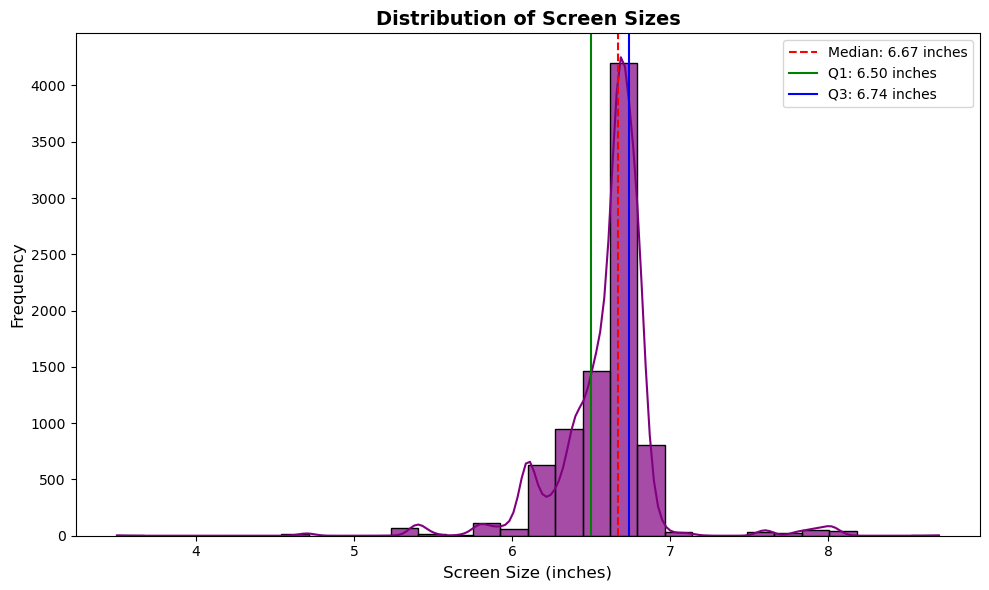

In [56]:
# Trực quan hóa: Vẽ biểu đồ histogram thể hiện phân phối của cột 'kich_thuoc_man_hinh'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='kich_thuoc_man_hinh', bins=30, kde=True, color='purple', alpha=0.7, edgecolor='black')
median = data['kich_thuoc_man_hinh'].median()
Q1 = data['kich_thuoc_man_hinh'].quantile(0.25)
Q3 = data['kich_thuoc_man_hinh'].quantile(0.75)
plt.axvline(x=median, color='r', linestyle='--', label=f'Median: {median:.2f} inches')
plt.axvline(x=Q1, color='g', linestyle='-', label=f'Q1: {Q1:.2f} inches')
plt.axvline(x=Q3, color='b', linestyle='-', label=f'Q3: {Q3:.2f} inches')
plt.title('Distribution of Screen Sizes', fontsize=14, fontweight='bold')
plt.xlabel('Screen Size (inches)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Xu hướng kích thước màn hình điện thoại hiện nay chủ yếu tập trung vào khoảng từ 6.50 đến 6.74 inch, với trung vị là 6.67 inch. Điều này phản ánh sự ưa chuộng của thị trường đối với các màn hình lớn, cung cấp trải nghiệm người dùng tốt hơn cho việc xem nội dung đa phương tiện và tương tác.

## Độ sáng màn hình

Độ sáng màn hình, thường đo bằng nits hoặc candela trên mét vuông (cd/m²), là một chỉ số quan trọng mô tả cường độ ánh sáng mà màn hình có thể phát ra. Hiện nay, xu hướng là tăng độ sáng lên tới 1000 nits hoặc cao hơn để cải thiện khả năng đọc dưới ánh sáng mạnh và hỗ trợ tốt hơn cho công nghệ HDR, mang lại hình ảnh sống động và chi tiết. Đồng thời, các công nghệ hiển thị mới như OLED và AMOLED giúp tiết kiệm năng lượng mặc dù có độ sáng cao.

In [57]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'do_sang_man_hinh'
print(f"Missing ratio of 'do_sang_man_hinh': {missing_ratio(data['do_sang_man_hinh']).round(2)}%")

# In ra số lượng giá trị khác nhau của cột 'do_sang_man_hinh' và số lượng của mỗi giá trị
print(f"Number of screen brightness levels: {data['do_sang_man_hinh'].nunique()}\n{data['do_sang_man_hinh'].value_counts()}")

# Điền giá trị thiếu bằng giá trị trung bình của cột 'do_sang_man_hinh'
mean_brightness = data['do_sang_man_hinh'].mean().round(2)
data['do_sang_man_hinh'] = data['do_sang_man_hinh'].fillna(mean_brightness)

Missing ratio of 'do_sang_man_hinh': 38.97%
Number of screen brightness levels: 51
do_sang_man_hinh
1000.0    663
1200.0    542
1300.0    470
800.0     393
500.0     336
1800.0    226
3000.0    216
1600.0    216
4500.0    183
1400.0    173
450.0     169
2600.0    168
600.0     161
1500.0    161
700.0     139
625.0     130
550.0     113
1750.0     96
1100.0     96
2000.0     88
950.0      73
650.0      72
400.0      64
480.0      54
900.0      48
4000.0     43
3200.0     37
1450.0     36
2800.0     31
580.0      27
2400.0     25
560.0      18
1900.0     15
1700.0     14
850.0      14
2150.0     12
430.0      10
2100.0      8
920.0       8
840.0       6
2500.0      6
1550.0      6
420.0       6
720.0       6
680.0       5
1150.0      4
528.0       4
880.0       3
750.0       2
630.0       2
6000.0      1
Name: count, dtype: int64


Dùng biểu đồ histogram để khảo sát sự phân phối của độ sáng màn hình.

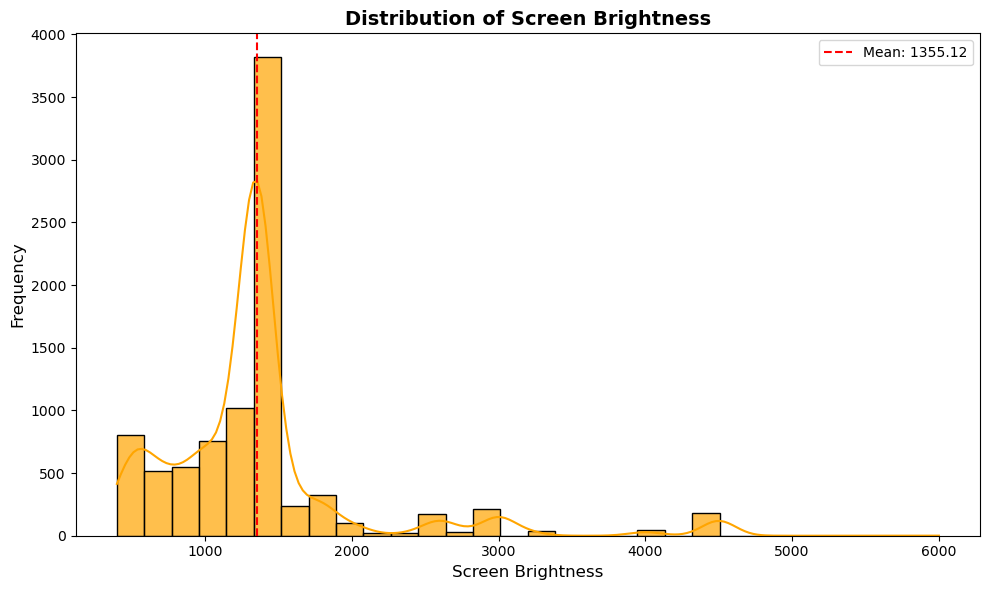

In [58]:
# Trực quan: Vẽ biểu đồ histogram thể hiện phân phối của cột
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='do_sang_man_hinh', bins=30, kde=True, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(x=mean_brightness, color='r', linestyle='--', label=f'Mean: {mean_brightness:.2f}')
plt.title('Distribution of Screen Brightness', fontsize=14, fontweight='bold')
plt.xlabel('Screen Brightness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Biểu đồ cho thấy phần lớn các điện thoại có độ sáng màn hình dưới 2000 nits, với mức độ sáng màn hình phổ biến nhất là 1000.0 nits, với 663 thiết bị sử dụng mức độ sáng này. Điều này phản ánh xu hướng thiết kế màn hình với độ sáng vừa phải, cân bằng giữa chất lượng hiển thị và hiệu quả năng lượng, trong khi những màn hình cực kỳ sáng trên 4000 nits là khá hiếm.

## Tần số quét

Tần số quét của màn hình, đo bằng Hertz (Hz), định nghĩa số lần màn hình có thể làm mới hình ảnh trong một giây. Hiện nay, xu hướng của tần số quét đang tăng lên, với các màn hình điện thoại thông minh thường có tần số quét từ 90Hz đến 120Hz hoặc cao hơn. Điều này cải thiện đáng kể độ mượt mà của hình ảnh và độ phản hồi cảm ứng, mang lại trải nghiệm người dùng mượt mà và năng động hơn, đặc biệt là khi chơi game và xem video.

In [59]:
# Hiển thị tỉ lệ dữ liệu thiếu của cột 'tan_so_quet'
print(f"Missing ratio of 'tan_so_quet': {missing_ratio(data['tan_so_quet']).round(2)}%")

# In ra số lượng giá trị khác nhau của cột 'tan_so_quet' và số lượng của mỗi giá trị
print(f"Number of refresh rates: {data['tan_so_quet'].nunique()}\n{data['tan_so_quet'].value_counts()}")

# Điền giá trị thiếu bằng giá trị trung bình
mean_refresh_rate = data['tan_so_quet'].mean().round(0)
data['tan_so_quet'] = data['tan_so_quet'].fillna(mean_refresh_rate)

Missing ratio of 'tan_so_quet': 23.75%
Number of refresh rates: 7
tan_so_quet
120.0    4870
90.0      825
144.0     801
60.0      130
165.0     109
180.0       8
240.0       3
Name: count, dtype: int64


Sử dụng biểu đồ cột để trực quan hóa và xác định tần số quét màn hình nào là phổ biến nhất trong dữ liệu thu thập được.

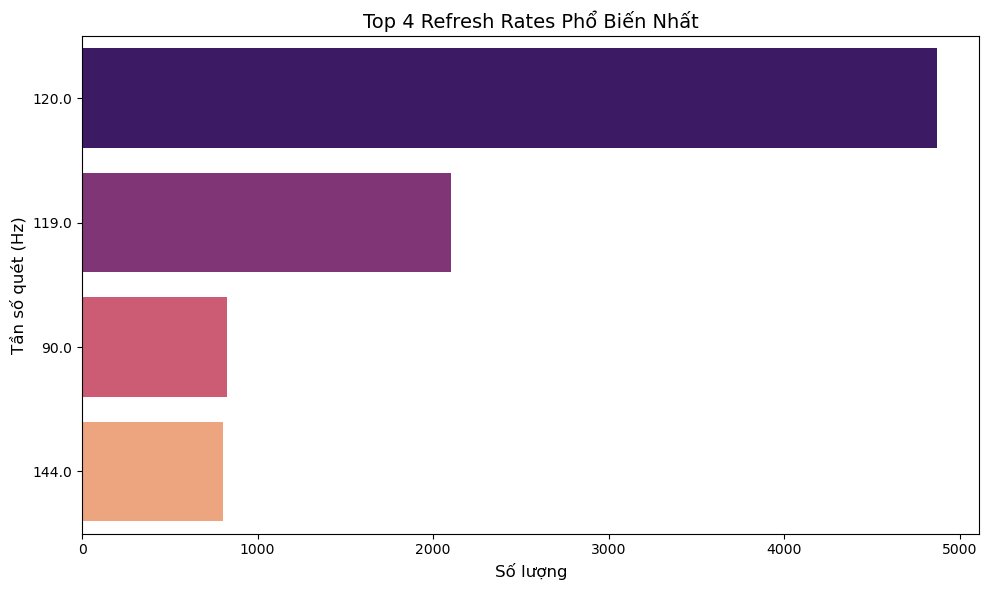

In [60]:
# Trực quan hóa: Vẽ biểu đồ cột thể hiện số lượng tần số quép phổ biến nhất (Top 4)
plt.figure(figsize=(10, 6))
sns.countplot(y='tan_so_quet', 
              data=data, 
              order=data['tan_so_quet'].value_counts().iloc[:4].index, 
              palette='magma')
plt.title('Top 4 Refresh Rates Phổ Biến Nhất', fontsize=14) 
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Tần số quét (Hz)', fontsize=12)
plt.tight_layout()
plt.show()

Từ biểu đồ, rõ ràng tần số quét 120 Hz là phổ biến nhất, cho thấy xu hướng người dùng ưa chuộng màn hình có tần số quét cao để trải nghiệm đồ họa mượt mà. Các tần số quét 90 Hz và 144 Hz cũng được ưa chuộng nhưng với số lượng thấp hơn.

## Loại màn hình

**Màn hình điện thoại** là thành phần hiển thị thông tin và là mặt tương tác chính với người dùng, thường tính bằng **inch**. Màn hình càng lớn, trải nghiệm xem càng thú vị.

**Các loại màn hình phổ biến**:
- **LCD (Liquid Crystal Display)**: Đây là loại màn hình sử dụng tinh thể lỏng, phổ biến với mức giá tầm trung. Màn hình LCD có độ sáng tốt nhưng màu sắc không bằng các loại màn hình khác.
- **OLED (Organic Light-Emitting Diode)**: Màn hình này sử dụng các hạt phát quang hữu cơ, cho màu đen sâu và màu sắc rực rỡ. Các điện thoại cao cấp thường trang bị màn hình OLED.
- **AMOLED (Active Matrix Organic Light-Emitting Diode)**: Là phiên bản nâng cấp của OLED, với khả năng tiết kiệm năng lượng tốt hơn và màu sắc hiển thị đậm nét hơn.

**Xu hướng hiện nay**:
- Nhiều hãng điện thoại chú trọng phát triển màn hình có độ phân giải cao và tần số quét lớn (từ **90Hz** đến **120Hz**) để đáp ứng nhu cầu trải nghiệm mượt mà trong các tác vụ và chơi game.

In [61]:
# Hiển thị tỉ lệ dữ liệu bị thiếu trong cột 'loai_man_hinh'
print(f"Missing ratio of 'loai_man_hinh': {missing_ratio(data['loai_man_hinh']).round(2)}%")

# In ra số lượng giá trị khác nhau của cột 'loai_man_hinh' và số lượng của mỗi giá trị
print(f"Number of screen types: {data['loai_man_hinh'].nunique()}\n{data['loai_man_hinh'].value_counts()}")

# Kiểm tra xem giá trị 'Unknown' đã tồn tại trong các kiểu màn hình chưa, nếu chưa thì thêm vào
if 'Unknown' not in data['loai_man_hinh'].cat.categories:
	data['loai_man_hinh'] = data['loai_man_hinh'].cat.add_categories('Unknown')

# Điền giá trị thiếu bằng giá trị 'Unknown'
data['loai_man_hinh'] = data['loai_man_hinh'].fillna('Unknown')

Missing ratio of 'loai_man_hinh': 3.73%
Number of screen types: 3
loai_man_hinh
AMOLED    4884
OLED      1843
LCD       1790
Name: count, dtype: int64


Dùng biểu đồ tròn để hiển thị sự phân phối các loại màn hình điện thoại.

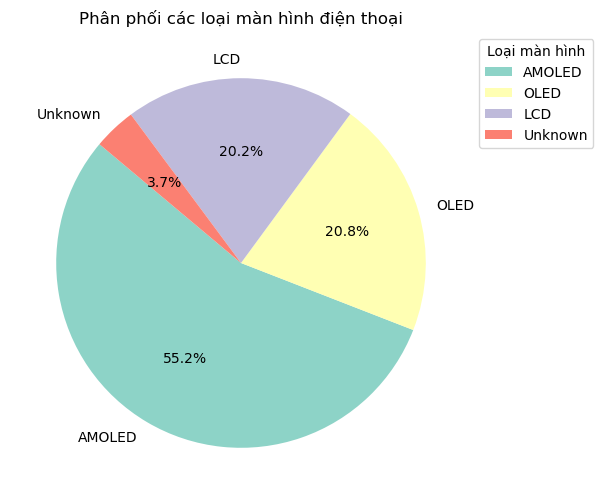

In [62]:
# Trực quan hóa: Vẽ biểu đồ tròn thể hiện tỷ lệ phân phối của các loại màn hình
plt.figure(figsize=(10, 6))
ax = data['loai_man_hinh'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.get_cmap('Set3').colors  
)
plt.title('Phân phối các loại màn hình điện thoại')
plt.ylabel('') 
ax.legend(title='Loại màn hình', loc='best', bbox_to_anchor=(1, 1))  
plt.show()

Biểu đồ cho thấy màn hình AMOLED đang là loại màn hình phổ biến nhất, chiếm 54.9% tổng số loại màn hình được sử dụng trong điện thoại, cho thấy xu hướng ưu tiên chất lượng hình ảnh và hiệu quả năng lượng. Màn hình OLED và LCD mỗi loại chiếm khoảng 20%, phản ánh sự đa dạng trong sự lựa chọn công nghệ màn hình tùy theo mức giá và đối tượng người dùng.

## Số thẻ SIM

SIM là thành phần không thể thiếu để điện thoại kết nối mạng di động và thực hiện các chức năng liên lạc cơ bản. Các loại SIM ngày càng nhỏ gọn và hiện đại hơn, đáp ứng nhu cầu phát triển của công nghệ di động.

In [63]:
# In ra tỉ lệ bị thiếu của cột 'so_the_sim'
missing_ratio_sim = missing_ratio(data['so_the_sim'])
print(f"Missing ratio of 'so_the_sim': {missing_ratio_sim:.2f}%")

# In ra số lượng các giá trị khác nhau của cột 'so_the_sim' và số lượng của mỗi giá trị
print(f"Number of SIM card slots: {data['so_the_sim'].nunique()}\n{data['so_the_sim'].value_counts()}")

Missing ratio of 'so_the_sim': 0.00%
Number of SIM card slots: 2
so_the_sim
2    8167
1     680
Name: count, dtype: int64


Xem xét sự phân bố của các thiết bị điện thoại dựa trên số lượng thẻ SIM được hỗ trợ.

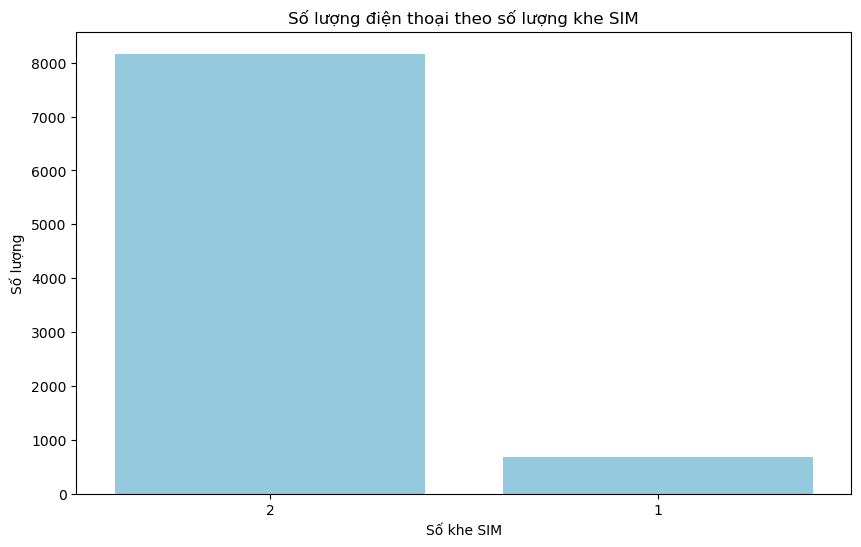

In [64]:
# Trực quan hóa: Vẽ biểu đồ cột thể hiện số lượng điện thoại theo số lượng khe SIM
plt.figure(figsize=(10, 6))
sns.countplot(x='so_the_sim', data=data, color='skyblue', order=data['so_the_sim'].value_counts().index)
plt.title('Số lượng điện thoại theo số lượng khe SIM')
plt.xlabel('Số khe SIM')
plt.ylabel('Số lượng')
plt.show()

Sự phổ biến của **2 khe SIM** phản ánh nhu cầu sử dụng nhiều SIM trên một thiết bị, đặc biệt ở các thị trường châu Á và các quốc gia đang phát triển. Tuy nhiên, các dòng điện thoại **1 khe SIM** vẫn tồn tại chủ yếu trên các thiết bị cao cấp hoặc thị trường đặc thù.

## Độ phân giải cam trước

**Độ phân giải camera trước** là chỉ số đo lường số lượng điểm ảnh mà camera trước của điện thoại có thể chụp được, thường tính bằng **megapixel (MP)**. Độ phân giải càng cao, chất lượng hình ảnh càng sắc nét, chi tiết hơn, đặc biệt khi chụp selfie hoặc gọi video.

Xu hướng hiện nay là điện thoại được trang bị **nhiều camera** để tăng cường khả năng chụp ảnh và quay video, đáp ứng nhu cầu đa dạng của người dùng. Camera trước cũng ngày càng được nâng cấp với độ phân giải cao, tích hợp AI và các công nghệ hiện đại để mang lại trải nghiệm chụp ảnh selfie tốt nhất.

In [65]:
# In ra tỉ lệ bị thiếu của cột 'do_phan_giai_camera_truoc'
missing_ratio_front_cam = missing_ratio(data['do_phan_giai_cam_truoc'])
print(f"Missing ratio of 'do_phan_giai_cam_truoc': {missing_ratio_front_cam:.2f}%")

# In ra số lượng các giá trị khác nhau của cột 'do_phan_giai_cam_truoc' và số lượng của mỗi giá trị
print(f"Number of front camera resolutions: {data['do_phan_giai_cam_truoc'].nunique()}\n{data['do_phan_giai_cam_truoc'].value_counts()}")


Missing ratio of 'do_phan_giai_cam_truoc': 0.00%
Number of front camera resolutions: 52
do_phan_giai_cam_truoc
[16.0]          2199
[32.0]          1503
[8.0]           1115
[12.0]          1023
[20.0]           853
[5.0]            420
[13.0]           353
[50.0]           320
[10.0]           280
[7.0]             94
[40.0]            87
[32.0, 32.0]      69
[]                63
[24.0]            35
[42.0]            34
[20.0, 2.0]       29
[4.0, 10.0]       29
[10.5]            26
[25.0]            26
[16.0, 16.0]      22
[60.0]            22
[10.8]            21
[2.0]             21
[32.0, 8.0]       18
[16.0, 2.0]       17
[44.0]            15
[20.0, 32.0]      14
[50.0, 8.0]       13
[50.0, 2.0]       12
[16.0, 12.0]      12
[12.0, 16.0]      10
[44.0, 8.0]       10
[10.0, 8.0]       10
[10.7]             9
[8.0, 5.0]         9
[10.0, 10.0]       8
[4.0]              7
[11.1]             6
[16.0, 8.0]        4
[5.0, 8.0]         4
[13.0, 2.0]        3
[1.2]              3
[2.1]  

Phân tích sự phân phối độ phân giải của camera dựa trên tổng độ phân giải của cụm camera trước.

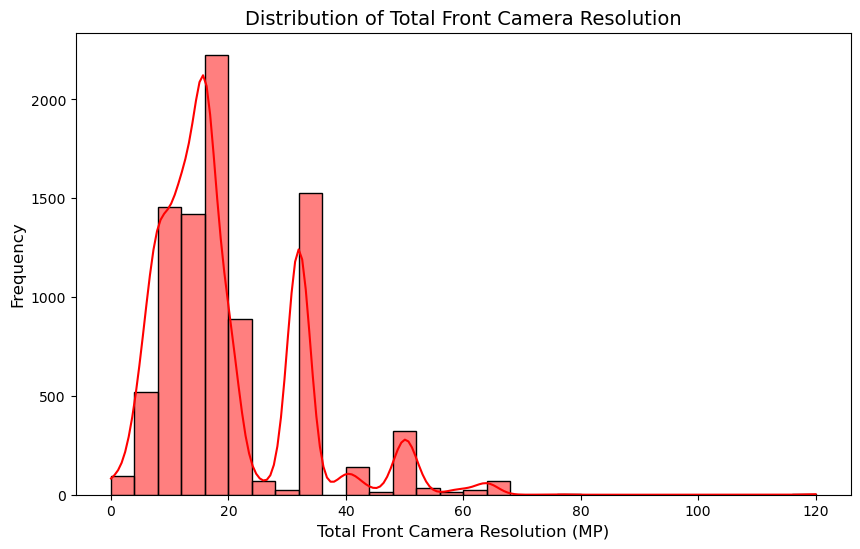

In [66]:
# Trực Trực quan quan hóa: hóa: Vẽ Vẽ biểu biểu đồ đồ histogram histogram thể thể hiện hiện phân phân phối phối độ độ phân phân giải giải camera camera trước trước
# Hàm tính tổng độ phân giải camera trước
def calculate_total_resolution(resolution_list):
    try:
        resolution = ast.literal_eval(resolution_list) 
        return sum(map(float, resolution)) 
    except (ValueError, SyntaxError): 
        return 0

# Áp dụng hàm để tính tổng độ phân giải camera trước
data['total_front_camera_resolution'] = data['do_phan_giai_cam_truoc'].apply(calculate_total_resolution)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='total_front_camera_resolution', bins=30, kde=True, color='red')  # Đổi màu thành đỏ
plt.title('Distribution of Total Front Camera Resolution', fontsize=14)
plt.xlabel('Total Front Camera Resolution (MP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Nhận xét**:  
Độ phân giải camera trước chủ yếu nằm trong khoảng **8 MP đến 32 MP**, với các giá trị phổ biến nhất là **16 MP** và **32 MP**. Một số ít thiết bị có độ phân giải cao hơn (**40 MP đến 60 MP**), chủ yếu thuộc phân khúc cao cấp. Phân phối có xu hướng lệch phải, cho thấy phần lớn tập trung ở độ phân giải trung bình.

## Độ phân giải cam sau

- **Vai trò chính**: Camera sau là cụm camera chính trên điện thoại, phục vụ nhu cầu **chụp ảnh phong cảnh, chân dung, quay video** và các tác vụ nhiếp ảnh chuyên nghiệp hơn.

- **Xu hướng hiện nay**:  
   - Điện thoại hiện đại thường được trang bị từ **2 đến 4 camera sau** với các độ phân giải khác nhau, phục vụ cho nhiều mục đích:  
     - **Camera chính**: Độ phân giải cao (48MP, 64MP, 108MP hoặc thậm chí 200MP) để chụp ảnh sắc nét.  
     - **Camera góc siêu rộng**: Thường từ **8MP - 16MP** để chụp ảnh bao quát khung cảnh lớn.  
     - **Camera tele**: Hỗ trợ zoom quang học, độ phân giải thường từ **8MP - 12MP**.  
     - **Camera macro/xóa phông**: Độ phân giải từ **2MP - 5MP**, hỗ trợ chụp ảnh cận cảnh hoặc xóa phông chân dung.  

- **Công nghệ đi kèm**:  
   - Tích hợp **AI thông minh** để nhận diện cảnh vật và điều chỉnh thông số tự động.  
   - Hỗ trợ **chống rung quang học (OIS)**, **HDR**, và quay video chất lượng **4K/8K**.  

**Độ phân giải camera sau** ngày càng cao, đặc biệt là camera chính với độ phân giải từ **48MP** trở lên, thậm chí đạt **108MP** hoặc **200MP** trên các thiết bị cao cấp. Điện thoại hiện đại thường có **nhiều camera sau** để phục vụ các nhu cầu khác nhau như chụp ảnh góc rộng, zoom xa, xóa phông và chụp cận cảnh, kết hợp với công nghệ **AI** và quay video chất lượng cao (**4K/8K**).

In [67]:
# In ra tỉ lệ bị thiếu của cột 'do_phan_giai_camera_sau'
missing_ratio_rear_cam = missing_ratio(data['do_phan_giai_cam_sau'])
print(f"Missing ratio of 'do_phan_giai_cam_sau': {missing_ratio_rear_cam:.2f}%")

# In ra số lượng các giá trị khác nhau của cột 'do_phan_giai_cam_sau' và số lượng của mỗi giá trị
print(f"Number of rear camera resolutions: {data['do_phan_giai_cam_sau'].nunique()}\n{data['do_phan_giai_cam_sau'].value_counts()}")

Missing ratio of 'do_phan_giai_cam_sau': 0.00%
Number of rear camera resolutions: 271
do_phan_giai_cam_sau
[64.0, 8.0, 2.0]                       566
[50.0, 8.0, 2.0]                       524
[50.0, 2.0]                            489
[12.0, 12.0]                           435
[50.0, 8.0]                            339
[50.0, 50.0, 50.0]                     326
[50.0, 10.0, 12.0]                     237
[108.0, 8.0, 2.0]                      203
[48.0, 12.0]                           162
[48.0, 8.0, 5.0]                       147
[12.0]                                 142
[12.0, 12.0, 12.0]                     142
[48.0, 8.0, 2.0, 2.0]                  141
[48.0, 12.0, 12.0]                     138
[50.0]                                 132
[64.0, 2.0]                            122
[13.0]                                 119
[48.0, 8.0, 2.0]                       115
[108.0, 2.0]                           112
[13.0, 2.0]                            107
[50.0, 64.0, 50.0]               

Phân tích sự phân phối độ phân giải của camera dựa trên tổng độ phân giải của cụm camera sau.

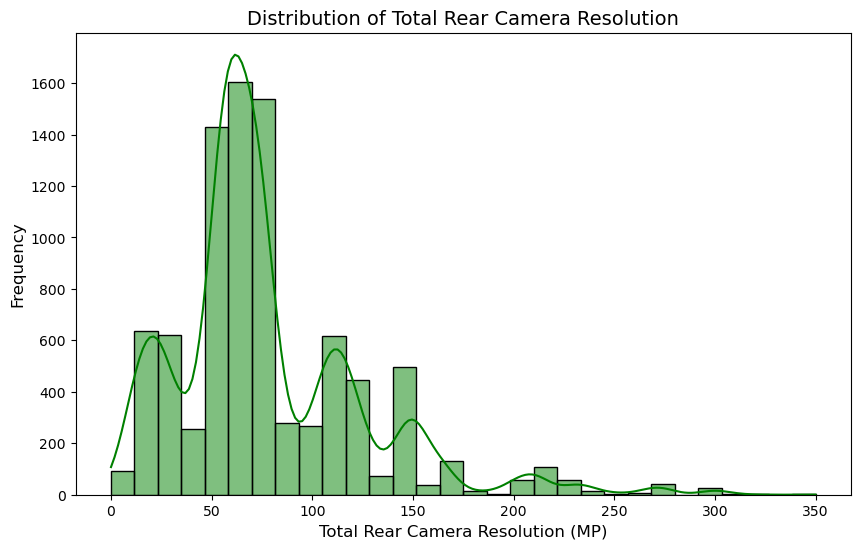

In [68]:
# Trực quan hóa: Vẽ biểu đồ histogram thể hiện phân phối độ phân giải camera sau
# Hàm tính tổng độ phân giải camera sau
def calculate_total_resolution(resolution_list):
    try:
        resolution = ast.literal_eval(resolution_list)  
        return sum(map(float, resolution))  
    except (ValueError, SyntaxError):  
        return 0
    
# Áp dụng hàm để tính tổng độ phân giải camera sau
data['total_rear_camera_resolution'] = data['do_phan_giai_cam_sau'].apply(calculate_total_resolution)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='total_rear_camera_resolution', bins=30, kde=True, color='green')  
plt.title('Distribution of Total Rear Camera Resolution', fontsize=14)
plt.xlabel('Total Rear Camera Resolution (MP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Nhận xét**:  
Độ phân giải camera sau chủ yếu tập trung trong khoảng **48 MP đến 64 MP**, đây là mức phổ biến nhất hiện nay. Có một số cụm giá trị cao hơn, như **108 MP** và một vài điểm ngoại lệ lên đến **200 MP hoặc hơn**, thuộc các thiết bị cao cấp. Phân phối có xu hướng **lệch phải**, cho thấy phần lớn thiết bị có độ phân giải trung bình và chỉ một số ít sở hữu camera độ phân giải rất cao.

---

# KẾT LUẬN

**Sau khi khám phá dữ liệu tổng quan và chi tiết về các thuộc tính trong bộ dữ liệu, chúng ta đã rút ra một số nhận xét quan trọng về xu hướng điện thoại trên thị trường Việt Nam như sau:**

- **Màu Sắc Phổ Biến**
    - **Xanh và Đen**: Hai màu sắc được ưa chuộng nhất, phản ánh sự tinh tế trong thẩm mỹ.
    - **Trắng**: Mang lại vẻ đẹp tinh khiết và sang trọng.
    - **Tím và Vàng**: Thường dành cho các phiên bản đặc biệt hoặc giới hạn.

- **Loại Pin và Màn Hình**
    - **Li-Po (Lithium Polymer)**: Ưu tiên vì kích thước nhỏ gọn và ổn định.
    - **Li-Ion (Lithium Ion)**: Dần được thay thế bởi Li-Po nhờ ưu điểm về độ bền và an toàn.
    - **AMOLED và Super AMOLED**: Chiếm ưu thế với khả năng hiển thị sắc nét, màu sắc rực rỡ và hiệu quả năng lượng cao.
    - **IPS LCD**: Vẫn còn phổ biến trong các dòng sản phẩm giá rẻ và tầm trung.

- **Giá Cả và Phân Khúc Thị Trường**
    - **Cao cấp**: Giá từ 15 triệu đồng trở lên với tính năng tiên tiến.
    - **Tầm trung**: Giá từ 7 đến 15 triệu đồng, cân bằng giữa giá cả và tính năng.
    - **Giá rẻ**: Dưới 7 triệu đồng, phù hợp với nhu cầu cơ bản.

- **Hiệu Năng và Bộ Nhớ**
    - **Qualcomm Snapdragon và MediaTek Dimensity**: Là hai CPU phổ biến nhất, đáp ứng nhu cầu về hiệu năng cao và khả năng đa nhiệm.
    - **Dung lượng lưu trữ**: 256GB và 128GB là phổ biến nhất.
    - **RAM**: Chủ yếu từ 8GB đến 12GB, cho hiệu năng tối ưu.

- **Kích Thước Màn Hình và Độ Sáng**
    - **Kích thước**: Phổ biến từ 6.50 đến 6.74 inch, với trung vị là 6.67 inch.
    - **Độ sáng**: 1000 nits là mức độ sáng phổ biến, cân bằng giữa hiển thị và tiêu thụ năng lượng.

- **Tần Số Quét và Thời Gian Bảo Hành**
    - **Tần số quét**: 120 Hz là mức phổ biến nhất, đảm bảo đồ họa mượt mà.
    - **Bảo hành**: 12 tháng là thời gian bảo hành tiêu chuẩn, trong khi 24 tháng áp dụng cho một số sản phẩm.

#### Tổng Kết
Thị trường điện thoại Việt Nam hiện nay đa dạng về lựa chọn, từ màu sắc và loại pin đến loại màn hình và giá cả. Người tiêu dùng có nhiều lựa chọn phù hợp với nhu cầu và ngân sách, với sự ưu tiên về các sản phẩm có màn hình lớn, hiệu năng cao và dung lượng lớn. Các nhà sản xuất đang đáp ứng nhu cầu này bằng cách cung cấp sản phẩm có cấu hình mạnh mẽ, thiết kế hiện đại, và đa dạng về tính năng.